# Credit Card Fraud Detection

In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
# from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

from sklearn.preprocessing import StandardScaler, PowerTransformer

C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Loading dataset
# dataset = pd.read_csv("C:/Users/user/Desktop/creditcard/creditcard.csv")
dataset = pd.read_csv("C:/Users/user/Desktop/creditcard/creditcard.csv")

In [3]:
# Display basic information about the dataset
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Understanding the data

In [4]:
# Displaying basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
len(dataset)

284807

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
len(dataset.columns)

31

In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing value treatment

In [9]:
dataset.isnull().sum()/len(dataset)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

There is no missing data in the dataset

In [10]:
# Check if any duplicate rows exist in the dataframe
duplicates_exist = dataset.duplicated().any()
print('Duplicate rows exist:', duplicates_exist)
print(f'Number of duplicate rows: {dataset.duplicated().sum()}')
dataset.drop_duplicates(inplace=True)

Duplicate rows exist: True
Number of duplicate rows: 1081


Removed the duplicate rows

In [11]:
dataset.shape

(283726, 31)

# Data imbalance

checking data imbalance with respect with target value (Class)

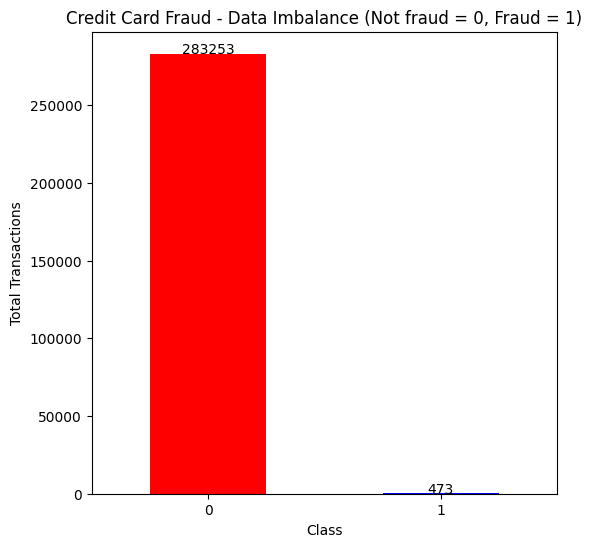

In [12]:
# Visualize Class Distribution as a Bar Graph with Count Annotations
plt.figure(figsize=(6, 6))
class_counts = dataset['Class'].value_counts()
ax = class_counts.plot(kind='bar', color=['red', 'blue'])

# Add count annotations to the bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.title('Credit Card Fraud - Data Imbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Total Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

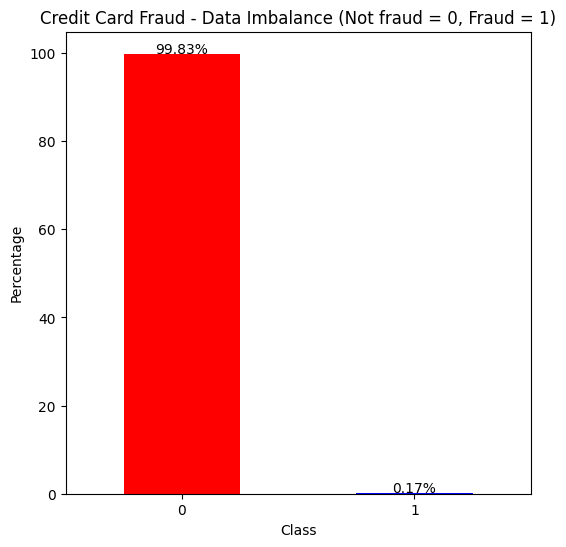

In [13]:
# Check class distribution
class_counts = dataset['Class'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar', color=['red', 'blue'])
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(round(count, 2)) + "%", ha='center')
plt.title('Credit Card Fraud - Data Imbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Only 473 transaction are fraudulent(492 transactions including duplicate rows). The data is highly imbalanced with respect to the target variable "Class".

# Comparison of Time Distribution between Fraudulent and Non-Fraudulent Credit Card Transactions

In [14]:
class_notfraud = dataset.loc[dataset['Class'] == 0]["Time"]
class_fraud = dataset.loc[dataset['Class'] == 1]["Time"]

hist_data = [class_notfraud, class_fraud]
group_label = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_label, show_hist=False, show_rug=False)
fig['layout'].update(title='Time Distribution between Fraudulent and Non-Fraudulent Credit Card Transactions', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraud transactions are more distributed than non-fraud transactions.

# Feature Engineering

In [15]:
dataset['Hour'] = dataset['Time'].apply(lambda x: np.floor(x / 3600))

temp = dataset.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(temp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


In [16]:
# Descriptive Statistics
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667,25.844917
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796,13.182881
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000,15.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000,23.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000,38.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,47.000000


The dataset is imbalanced, with the majority of transactions being non-fraudulent (Class 0) and a small minority  being fraudulent (Class 1).

C:\Users\user\AppData\Local\Temp\ipykernel_17668\3633798388.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



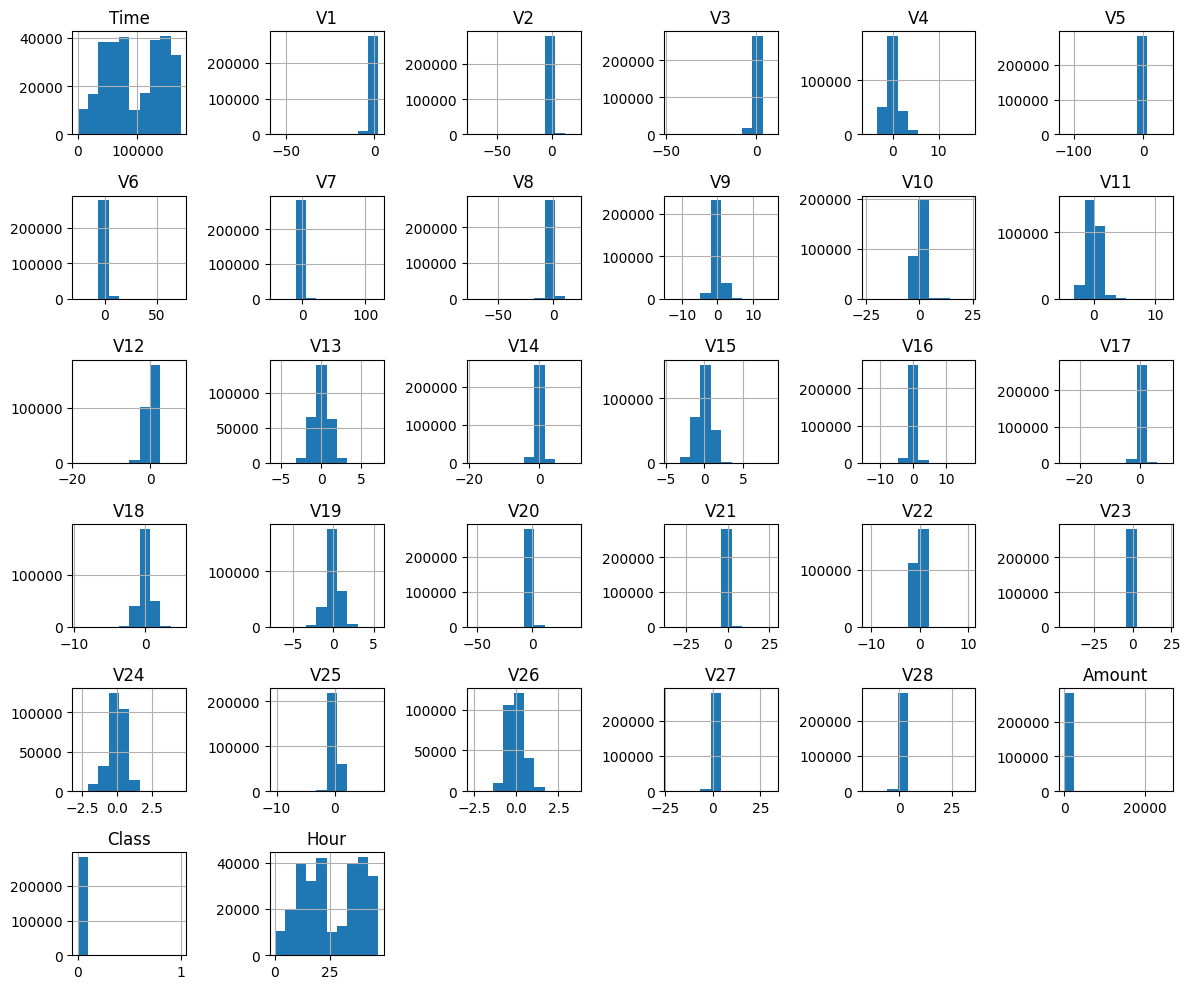

In [17]:
# Plot histogram of each feature
fig = plt.figure(figsize=(12,10))
dataset.hist(ax=fig)
plt.tight_layout()

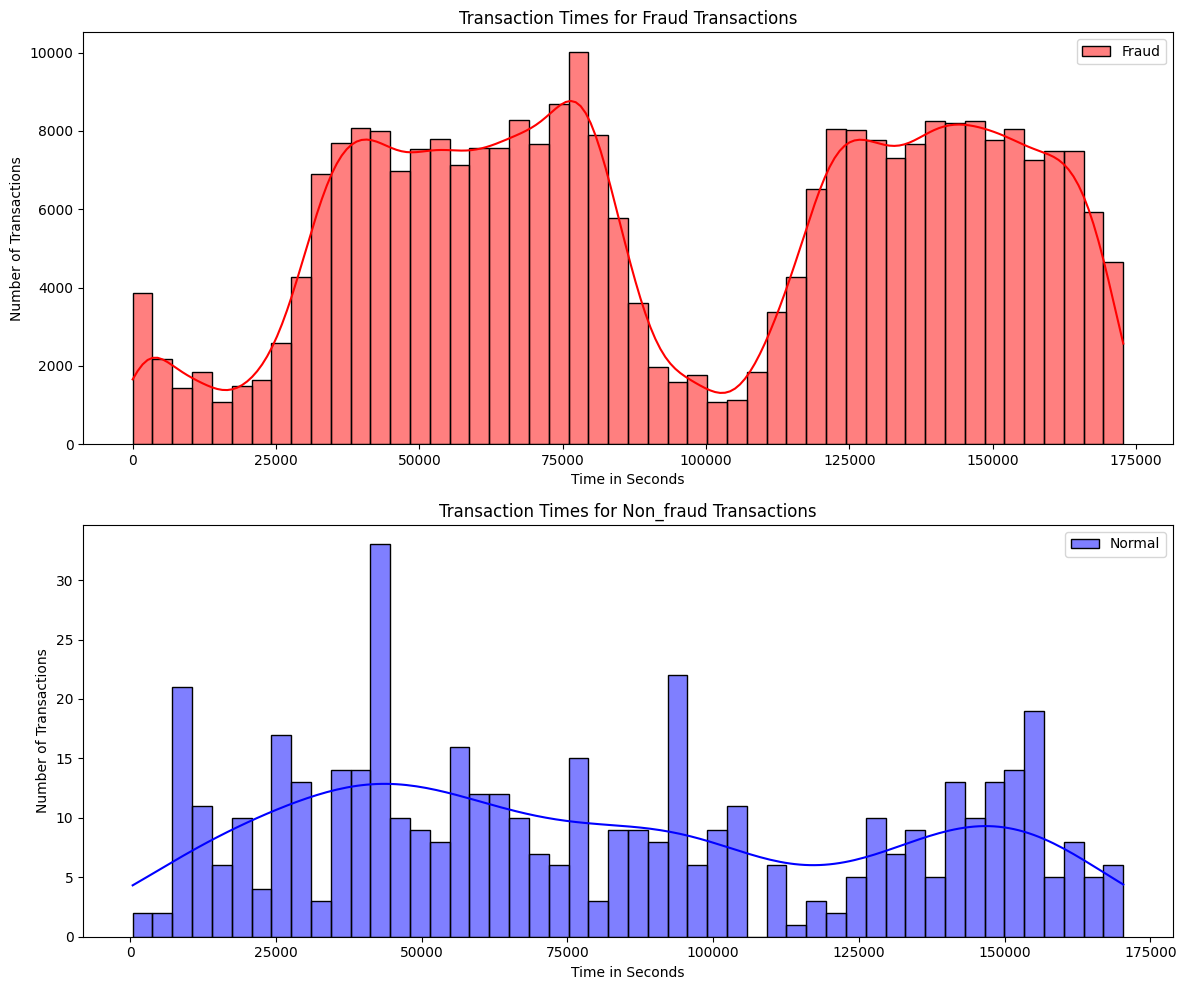

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#fraud transactions
sns.histplot(dataset[dataset['Class'] == 0]['Time'], bins=50, kde=True, color='red', label='Fraud', ax=ax1)
ax1.set_title('Transaction Times for Fraud Transactions')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

#normal transactions
sns.histplot(dataset[dataset['Class'] == 1]['Time'], bins=50, kde=True, color='blue', label='Normal', ax=ax2)
ax2.set_title('Transaction Times for Non_fraud Transactions')
ax2.set_xlabel('Time in Seconds')
ax2.set_ylabel('Number of Transactions')
ax2.legend()

plt.tight_layout()
plt.show()

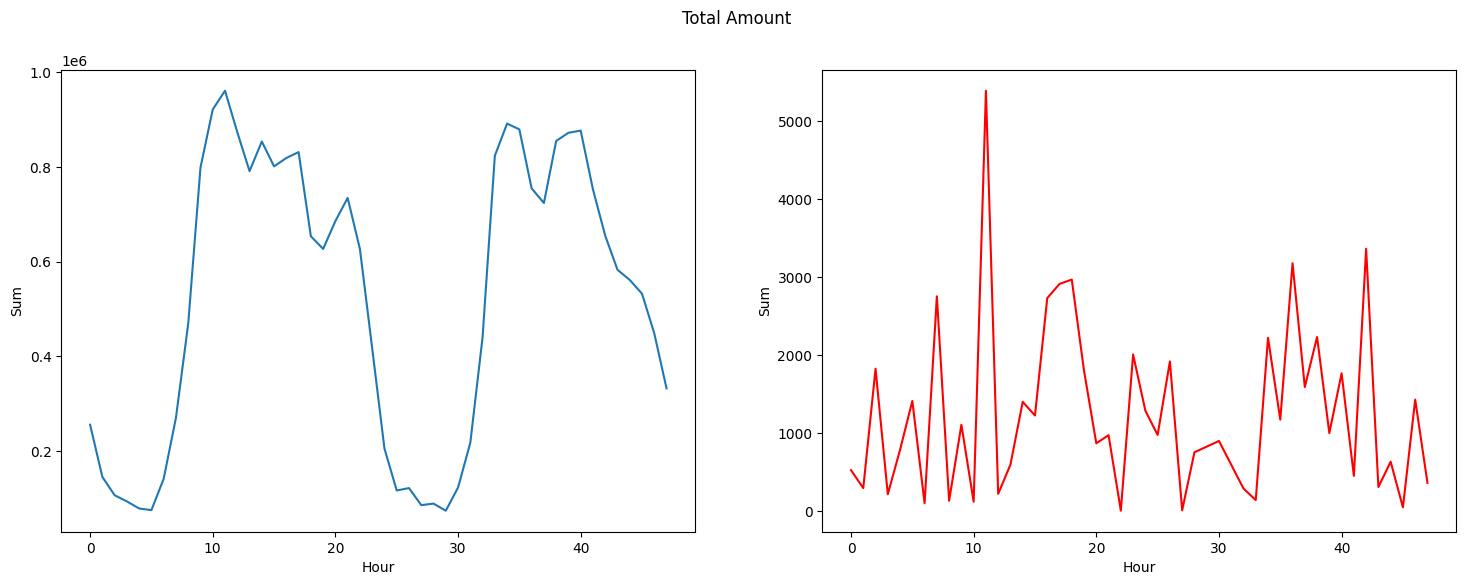

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

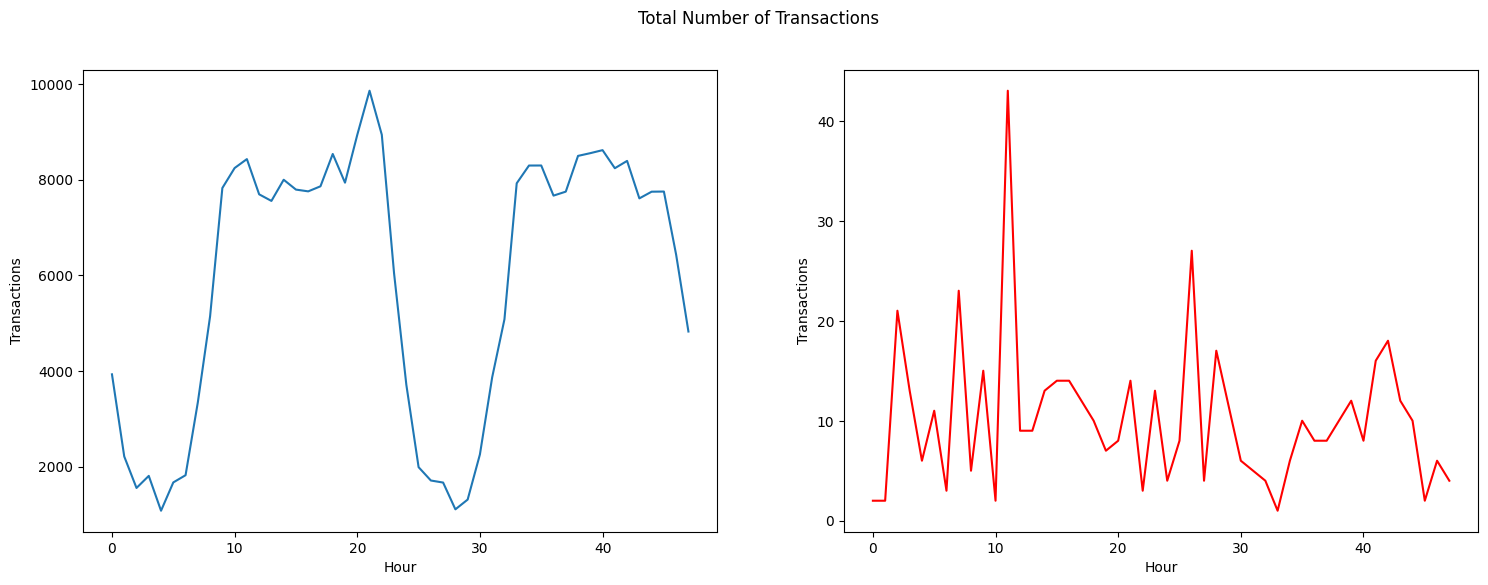

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

In [21]:
temp = dataset[['Amount','Class']].copy()
class_notfraud = temp.loc[temp['Class'] == 0]['Amount']
class_fraud = temp.loc[temp['Class'] == 1]['Amount']

In [22]:
class_notfraud.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
class_fraud.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Fraudulent transactions tend to have higher average amounts compared to non-fraudulent transactions

# Relationship between Time and Amount in Fraudulent Credit Card Transactions

Scatter plot to visualize the relationship between the time of occurrence and the transaction amount for fraudulent credit card transactions. Each data point represents a fraudulent transaction, where the x-axis denotes the time of the transaction and the y-axis represents the transaction amount.

In [24]:
# Filter fraudulent transactions
fraud = dataset[dataset['Class'] == 1]

# Create scatter plot trace
trace = go.Scatter(
    x=fraud['Time'],
    y=fraud['Amount'],
    mode='markers',
    marker=dict(
        color='red',
        opacity=0.5,
        line=dict(color='red', width=1)
    ),
    text=fraud['Amount'],
    name='Amount'
)

# Create layout
layout = go.Layout(
    title='Amount of Fraudulent Transactions',
    xaxis=dict(title='Time', showticklabels=True),
    yaxis=dict(title='Amount'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot figure
fig.show()

# Credit Card Transactions features correlation plot

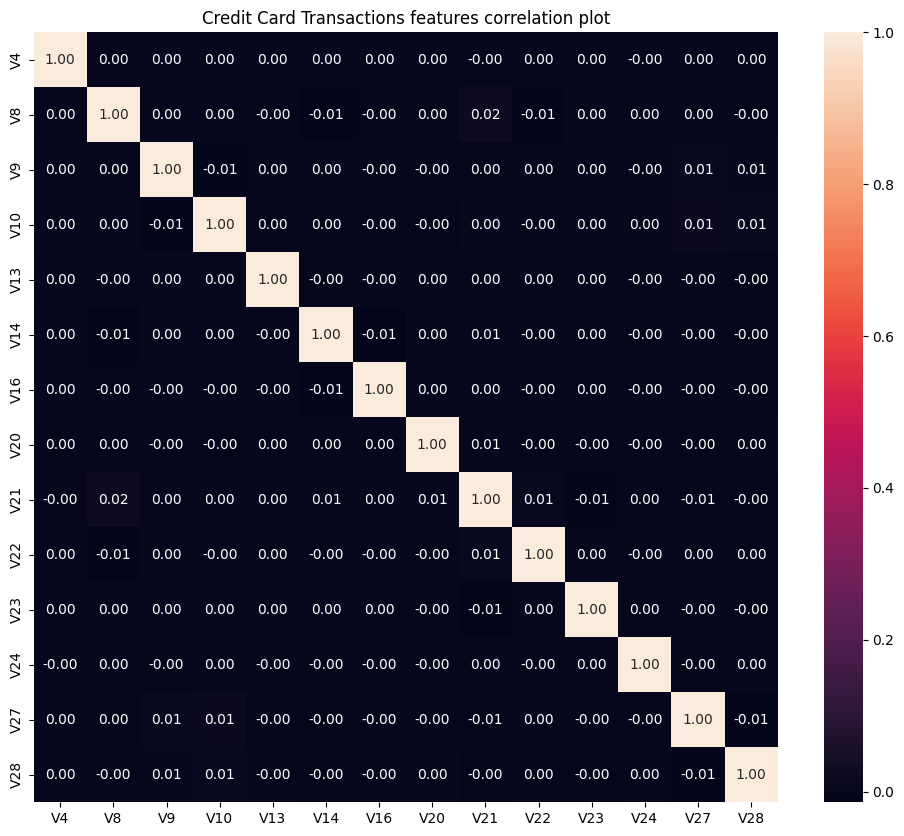

In [25]:
selected_features = ['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V20', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28']

plt.figure(figsize=(12, 10))
sns.heatmap(dataset[selected_features].corr(), annot=True, fmt=".2f")
plt.title('Credit Card Transactions features correlation plot')
plt.show()

The diagonal elements have a value of 1, indicating perfect correlation of a feature with itself. Most of the off-diagonal elements have values close to 0, suggesting low or no correlation between most feature pairs. However, there are some feature pairs with moderate positive or negative correlations, as indicated by values closer to 1 or -1.

# Predictive models

In [26]:
# Dropping the column Time as it is not impactful
dataset = dataset.drop(['Time'], axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [27]:
# Scaling the feature "Amount" for better result
sc = StandardScaler()
amount = dataset['Amount'].values

dataset['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0,0.0


In [28]:
# Define target and predictor values
x = dataset.drop('Class', axis=1)
y = dataset['Class']

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

In [30]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 283726 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
283726 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


### Split data in train and, test set

In [31]:
VALID_SIZE = 0.20
TEST_SIZE = 0.20
RANDOM_STATE = 42

In [32]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )

### Skewness Correction and Transformation with PowerTransformer

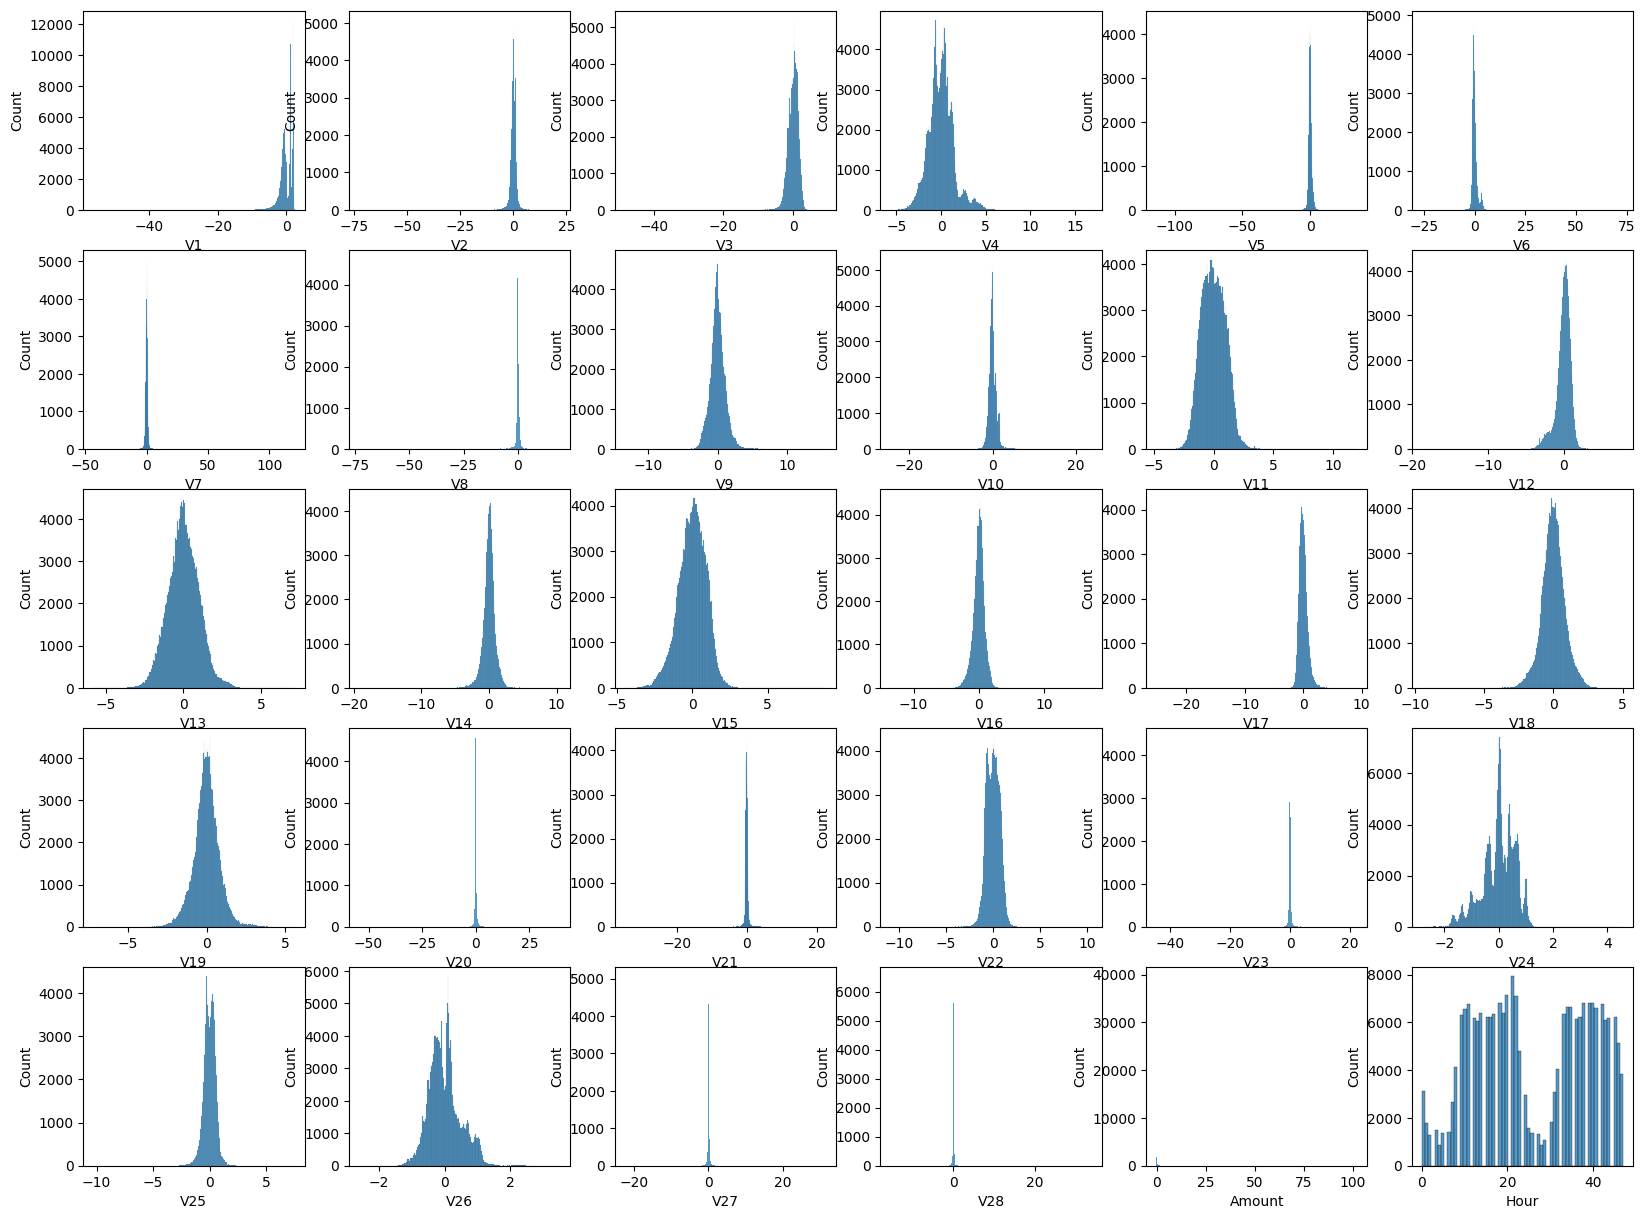

In [33]:
# Visualizing Skewness

col = x_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = x_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

In [34]:
# Correcting skewness using PowerTransformer

ptf = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

# Transform test and training data
x_train = ptf.fit_transform(x_train)
x_test = ptf.transform(x_test)

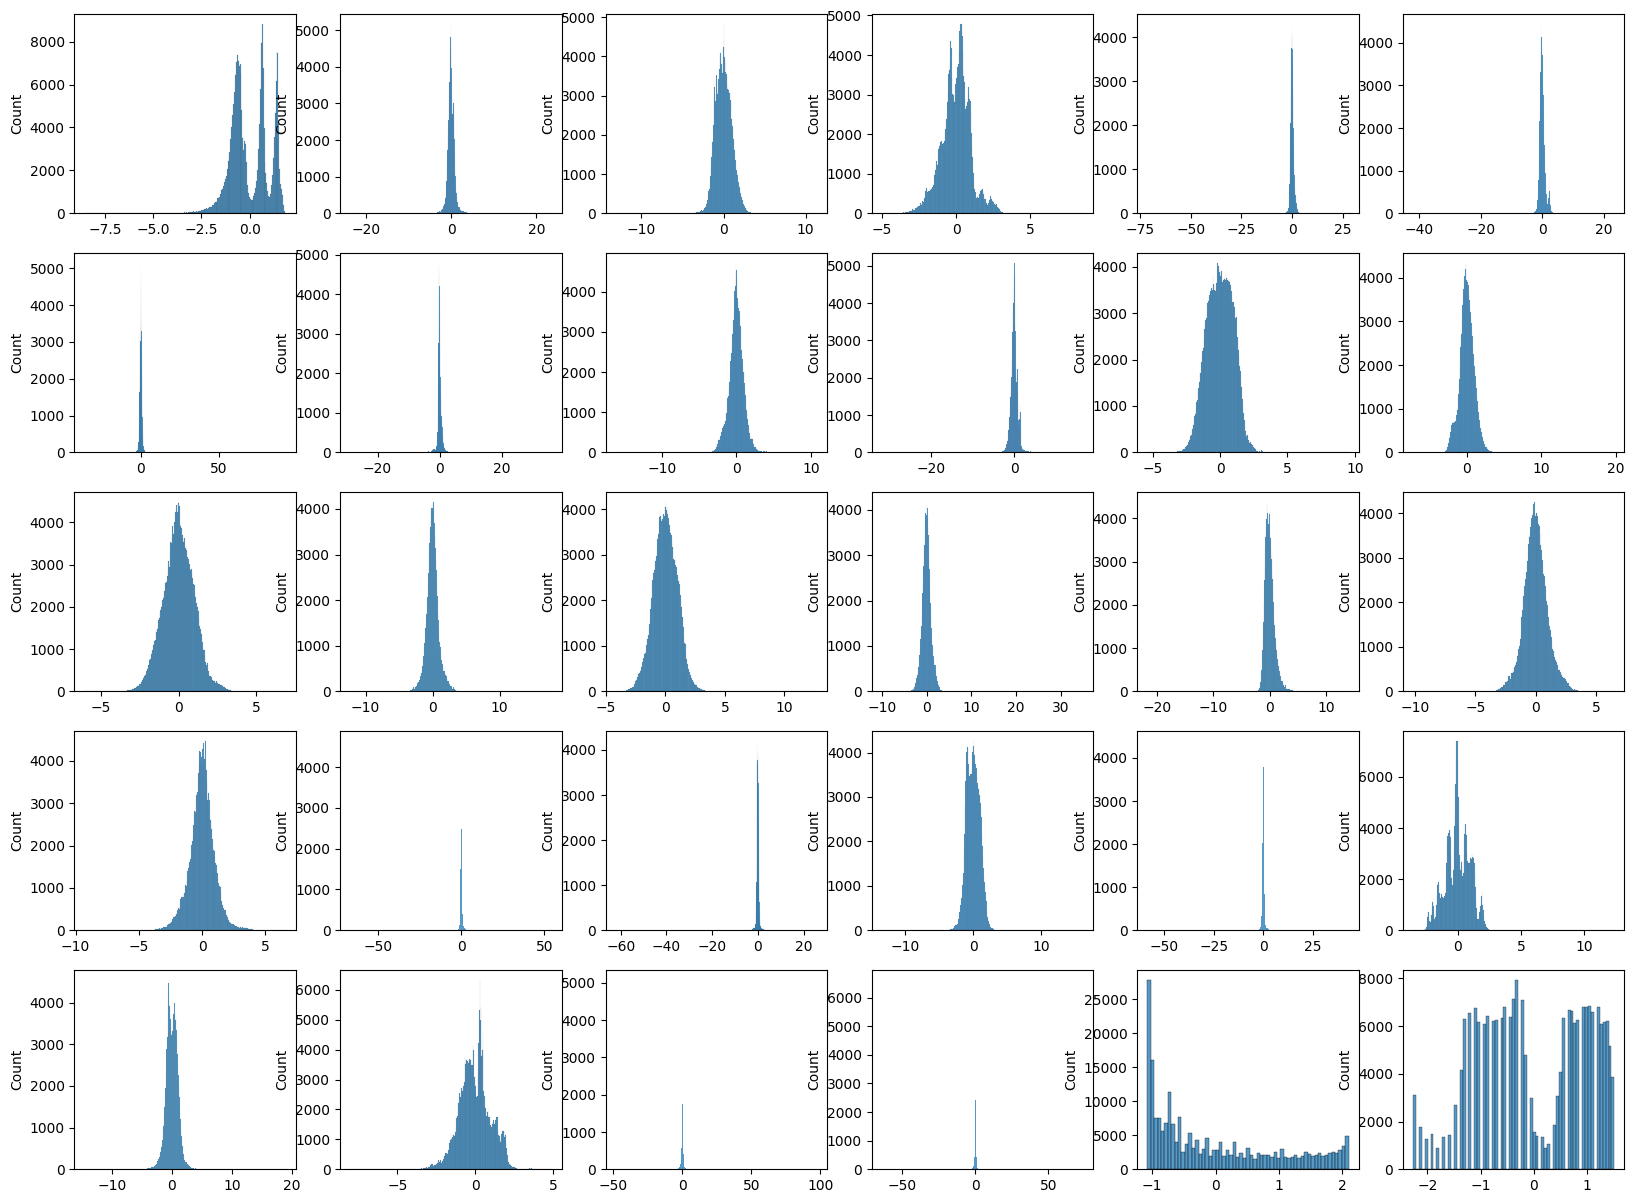

In [35]:
# Visualizing Distribution After Transformation
num_cols = x_train.shape[1]
plt.figure(figsize=(20, 15))
n = 1
for i in range(num_cols):
    plt.subplot(5, 6, n)
    sns.histplot(data=x_train[:, i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

# Hyperparameter tuning and model evaluation

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from catboost import CatBoostClassifier, Pool

In [37]:
# Reduced the iterations and set cv=3 as the model was running for more than 48 hours without completing

# Logistic Regression with hyperparameter tuning

In [38]:
# model_LR = LogisticRegression(solver='liblinear', max_iter=1000)
# grid_search_LR = GridSearchCV(model_LR, param_grid, cv=5, scoring='roc_auc')

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
model_LR = LogisticRegression(solver='liblinear', max_iter=500)
grid_search_LR = GridSearchCV(model_LR, param_grid, cv=3, scoring='roc_auc')

grid_search_LR.fit(x_train, y_train)
best_model_LR = grid_search_LR.best_estimator_
y_pred_LR = best_model_LR.predict(x_test)

# Random Forest Classifier with hyperparameter tuning

In [39]:
param_dist = {'n_estimators': [100, 200],
              'max_depth': [5, 10],
              'min_samples_split': [2, 5]}

In [40]:
# Create the RandomForestClassifier model
model_RFC = RandomForestClassifier(random_state=RANDOM_STATE)

In [41]:
# Create RandomizedSearchCV with reduced parameters
random_search_RFC = RandomizedSearchCV(model_RFC, param_dist, cv=3, scoring='roc_auc', n_iter=2, random_state=RANDOM_STATE, n_jobs=-1)

In [42]:
# Fit RandomizedSearchCV on the data
random_search_RFC.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc')

In [43]:
# Get the best model
best_model_RFC = random_search_RFC.best_estimator_

In [44]:
# Use the best model to make predictions
y_pred_RFC = best_model_RFC.predict(x_test)

# AdaBoost Classifier with hyperparameter tuning

In [45]:
# param_grid = {'learning_rate': [0.1, 0.5, 1.0],
#              'n_estimators': [50, 100, 200]}

param_grid = {'learning_rate': [0.1, 0.5, 1.0],
              'n_estimators': [50, 100]}

In [46]:
# model_ABC = AdaBoostClassifier(random_state=RANDOM_STATE)
model_ABC = AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)
grid_search_ABC = GridSearchCV(model_ABC, param_grid, cv=3, scoring='roc_auc')

In [47]:
grid_search_ABC.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [48]:
best_model_ABC = grid_search_ABC.best_estimator_
y_pred_ABC = best_model_ABC.predict(x_test)

# CatBoost Classifier with hyperparameter tuning

In [49]:
# Define the parameters grid
# grid = {'iterations': [500, 1000],
#        'learning_rate': [0.01, 0.05],
#        'depth': [6, 8, 10]}

grid = {'iterations': [200, 500],
        'learning_rate': [0.01, 0.05],
        'depth': [6, 8, 10]}

In [50]:
train_pool = Pool(x_train, y_train)

eval_pool = Pool(x_test, y_test)

In [51]:
# Initialize CatBoostClassifier
model_CBC = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_STATE)

In [52]:
# Perform grid search using cv

grid_search_results = model_CBC.grid_search(grid, train_pool, cv=3, verbose=50)

0:	test: 0.8881076	best: 0.8881076 (0)	total: 226ms	remaining: 44.9s
1:	test: 0.9490692	best: 0.9490692 (1)	total: 295ms	remaining: 29.2s
2:	test: 0.9478274	best: 0.9490692 (1)	total: 357ms	remaining: 23.4s
3:	test: 0.9400623	best: 0.9490692 (1)	total: 420ms	remaining: 20.6s
4:	test: 0.9452026	best: 0.9490692 (1)	total: 502ms	remaining: 19.6s
5:	test: 0.9473278	best: 0.9490692 (1)	total: 571ms	remaining: 18.4s
6:	test: 0.9504375	best: 0.9504375 (6)	total: 630ms	remaining: 17.4s
7:	test: 0.9533611	best: 0.9533611 (7)	total: 688ms	remaining: 16.5s
8:	test: 0.9593561	best: 0.9593561 (8)	total: 761ms	remaining: 16.1s
9:	test: 0.9667590	best: 0.9667590 (9)	total: 819ms	remaining: 15.6s
10:	test: 0.9671753	best: 0.9671753 (10)	total: 877ms	remaining: 15.1s
11:	test: 0.9713433	best: 0.9713433 (11)	total: 937ms	remaining: 14.7s
12:	test: 0.9715891	best: 0.9715891 (12)	total: 1.04s	remaining: 14.9s
13:	test: 0.9719772	best: 0.9719772 (13)	total: 1.09s	remaining: 14.5s
14:	test: 0.9738886	best: 

119:	test: 0.9803386	best: 0.9860991 (26)	total: 7.47s	remaining: 4.98s
120:	test: 0.9802963	best: 0.9860991 (26)	total: 7.53s	remaining: 4.92s
121:	test: 0.9802519	best: 0.9860991 (26)	total: 7.59s	remaining: 4.85s
122:	test: 0.9803656	best: 0.9860991 (26)	total: 7.64s	remaining: 4.79s
123:	test: 0.9804613	best: 0.9860991 (26)	total: 7.71s	remaining: 4.72s
124:	test: 0.9804420	best: 0.9860991 (26)	total: 7.76s	remaining: 4.66s
125:	test: 0.9804153	best: 0.9860991 (26)	total: 7.82s	remaining: 4.59s
126:	test: 0.9804899	best: 0.9860991 (26)	total: 7.87s	remaining: 4.53s
127:	test: 0.9804989	best: 0.9860991 (26)	total: 7.93s	remaining: 4.46s
128:	test: 0.9803643	best: 0.9860991 (26)	total: 7.98s	remaining: 4.39s
129:	test: 0.9802730	best: 0.9860991 (26)	total: 8.04s	remaining: 4.33s
130:	test: 0.9802801	best: 0.9860991 (26)	total: 8.09s	remaining: 4.26s
131:	test: 0.9802581	best: 0.9860991 (26)	total: 8.15s	remaining: 4.2s
132:	test: 0.9802711	best: 0.9860991 (26)	total: 8.2s	remaining: 

32:	test: 0.9783815	best: 0.9791009 (27)	total: 1.97s	remaining: 9.95s
33:	test: 0.9795779	best: 0.9795779 (33)	total: 2.03s	remaining: 9.9s
34:	test: 0.9796105	best: 0.9796105 (34)	total: 2.08s	remaining: 9.81s
35:	test: 0.9797789	best: 0.9797789 (35)	total: 2.13s	remaining: 9.71s
36:	test: 0.9797512	best: 0.9797789 (35)	total: 2.18s	remaining: 9.62s
37:	test: 0.9796736	best: 0.9797789 (35)	total: 2.24s	remaining: 9.54s
38:	test: 0.9798171	best: 0.9798171 (38)	total: 2.29s	remaining: 9.47s
39:	test: 0.9796860	best: 0.9798171 (38)	total: 2.35s	remaining: 9.4s
40:	test: 0.9798299	best: 0.9798299 (40)	total: 2.4s	remaining: 9.32s
41:	test: 0.9799420	best: 0.9799420 (41)	total: 2.47s	remaining: 9.29s
42:	test: 0.9798808	best: 0.9799420 (41)	total: 2.52s	remaining: 9.2s
43:	test: 0.9798364	best: 0.9799420 (41)	total: 2.57s	remaining: 9.11s
44:	test: 0.9800993	best: 0.9800993 (44)	total: 2.63s	remaining: 9.06s
45:	test: 0.9800483	best: 0.9800993 (44)	total: 2.68s	remaining: 8.97s
46:	test: 

150:	test: 0.9821303	best: 0.9821713 (147)	total: 8.77s	remaining: 2.85s
151:	test: 0.9822714	best: 0.9822714 (151)	total: 8.83s	remaining: 2.79s
152:	test: 0.9829022	best: 0.9829022 (152)	total: 8.89s	remaining: 2.73s
153:	test: 0.9829755	best: 0.9829755 (153)	total: 8.94s	remaining: 2.67s
154:	test: 0.9829724	best: 0.9829755 (153)	total: 8.99s	remaining: 2.61s
155:	test: 0.9829286	best: 0.9829755 (153)	total: 9.05s	remaining: 2.55s
156:	test: 0.9829594	best: 0.9829755 (153)	total: 9.11s	remaining: 2.49s
157:	test: 0.9835793	best: 0.9835793 (157)	total: 9.17s	remaining: 2.44s
158:	test: 0.9844690	best: 0.9844690 (158)	total: 9.23s	remaining: 2.38s
159:	test: 0.9844134	best: 0.9844690 (158)	total: 9.29s	remaining: 2.32s
160:	test: 0.9837577	best: 0.9844690 (158)	total: 9.34s	remaining: 2.26s
161:	test: 0.9837710	best: 0.9844690 (158)	total: 9.39s	remaining: 2.2s
162:	test: 0.9843817	best: 0.9844690 (158)	total: 9.45s	remaining: 2.14s
163:	test: 0.9844951	best: 0.9844951 (163)	total: 9.

66:	test: 0.9831418	best: 0.9860991 (26)	total: 4.09s	remaining: 26.5s
67:	test: 0.9832216	best: 0.9860991 (26)	total: 4.15s	remaining: 26.4s
68:	test: 0.9832136	best: 0.9860991 (26)	total: 4.2s	remaining: 26.3s
69:	test: 0.9832080	best: 0.9860991 (26)	total: 4.26s	remaining: 26.2s
70:	test: 0.9834600	best: 0.9860991 (26)	total: 4.31s	remaining: 26.1s
71:	test: 0.9834202	best: 0.9860991 (26)	total: 4.37s	remaining: 26s
72:	test: 0.9833674	best: 0.9860991 (26)	total: 4.42s	remaining: 25.9s
73:	test: 0.9833652	best: 0.9860991 (26)	total: 4.48s	remaining: 25.8s
74:	test: 0.9833077	best: 0.9860991 (26)	total: 4.54s	remaining: 25.7s
75:	test: 0.9831785	best: 0.9860991 (26)	total: 4.59s	remaining: 25.6s
76:	test: 0.9830772	best: 0.9860991 (26)	total: 4.65s	remaining: 25.5s
77:	test: 0.9831138	best: 0.9860991 (26)	total: 4.7s	remaining: 25.4s
78:	test: 0.9830666	best: 0.9860991 (26)	total: 4.76s	remaining: 25.4s
79:	test: 0.9830436	best: 0.9860991 (26)	total: 4.82s	remaining: 25.3s
80:	test: 

181:	test: 0.9800235	best: 0.9860991 (26)	total: 10.8s	remaining: 18.9s
182:	test: 0.9800356	best: 0.9860991 (26)	total: 10.9s	remaining: 18.9s
183:	test: 0.9799874	best: 0.9860991 (26)	total: 11s	remaining: 18.8s
184:	test: 0.9796602	best: 0.9860991 (26)	total: 11s	remaining: 18.8s
185:	test: 0.9796798	best: 0.9860991 (26)	total: 11.1s	remaining: 18.7s
186:	test: 0.9797140	best: 0.9860991 (26)	total: 11.1s	remaining: 18.6s
187:	test: 0.9796975	best: 0.9860991 (26)	total: 11.2s	remaining: 18.6s
188:	test: 0.9797267	best: 0.9860991 (26)	total: 11.2s	remaining: 18.5s
189:	test: 0.9796997	best: 0.9860991 (26)	total: 11.3s	remaining: 18.4s
190:	test: 0.9798734	best: 0.9860991 (26)	total: 11.4s	remaining: 18.4s
191:	test: 0.9798982	best: 0.9860991 (26)	total: 11.4s	remaining: 18.3s
192:	test: 0.9798311	best: 0.9860991 (26)	total: 11.5s	remaining: 18.2s
193:	test: 0.9800552	best: 0.9860991 (26)	total: 11.5s	remaining: 18.2s
194:	test: 0.9800722	best: 0.9860991 (26)	total: 11.6s	remaining: 18

297:	test: 0.9817282	best: 0.9860991 (26)	total: 17.9s	remaining: 12.1s
298:	test: 0.9817854	best: 0.9860991 (26)	total: 18s	remaining: 12.1s
299:	test: 0.9818416	best: 0.9860991 (26)	total: 18s	remaining: 12s
300:	test: 0.9818149	best: 0.9860991 (26)	total: 18.1s	remaining: 11.9s
301:	test: 0.9819004	best: 0.9860991 (26)	total: 18.1s	remaining: 11.9s
302:	test: 0.9819240	best: 0.9860991 (26)	total: 18.2s	remaining: 11.8s
303:	test: 0.9819196	best: 0.9860991 (26)	total: 18.2s	remaining: 11.8s
304:	test: 0.9819951	best: 0.9860991 (26)	total: 18.3s	remaining: 11.7s
305:	test: 0.9820386	best: 0.9860991 (26)	total: 18.3s	remaining: 11.6s
306:	test: 0.9820439	best: 0.9860991 (26)	total: 18.4s	remaining: 11.6s
307:	test: 0.9820514	best: 0.9860991 (26)	total: 18.4s	remaining: 11.5s
308:	test: 0.9820271	best: 0.9860991 (26)	total: 18.5s	remaining: 11.4s
309:	test: 0.9821421	best: 0.9860991 (26)	total: 18.6s	remaining: 11.4s
310:	test: 0.9821629	best: 0.9860991 (26)	total: 18.6s	remaining: 11.3

414:	test: 0.9827763	best: 0.9860991 (26)	total: 25.2s	remaining: 5.17s
415:	test: 0.9828071	best: 0.9860991 (26)	total: 25.4s	remaining: 5.12s
416:	test: 0.9826906	best: 0.9860991 (26)	total: 25.4s	remaining: 5.06s
417:	test: 0.9827105	best: 0.9860991 (26)	total: 25.5s	remaining: 5s
418:	test: 0.9827813	best: 0.9860991 (26)	total: 25.5s	remaining: 4.94s
419:	test: 0.9827791	best: 0.9860991 (26)	total: 25.6s	remaining: 4.88s
420:	test: 0.9827770	best: 0.9860991 (26)	total: 25.7s	remaining: 4.82s
421:	test: 0.9827919	best: 0.9860991 (26)	total: 25.8s	remaining: 4.76s
422:	test: 0.9828006	best: 0.9860991 (26)	total: 25.8s	remaining: 4.7s
423:	test: 0.9827832	best: 0.9860991 (26)	total: 25.9s	remaining: 4.64s
424:	test: 0.9827841	best: 0.9860991 (26)	total: 25.9s	remaining: 4.58s
425:	test: 0.9827527	best: 0.9860991 (26)	total: 26s	remaining: 4.51s
426:	test: 0.9827347	best: 0.9860991 (26)	total: 26s	remaining: 4.45s
427:	test: 0.9827375	best: 0.9860991 (26)	total: 26.1s	remaining: 4.39s


28:	test: 0.9789787	best: 0.9791009 (27)	total: 2.16s	remaining: 35.1s
29:	test: 0.9788768	best: 0.9791009 (27)	total: 2.22s	remaining: 34.7s
30:	test: 0.9788147	best: 0.9791009 (27)	total: 2.27s	remaining: 34.4s
31:	test: 0.9777640	best: 0.9791009 (27)	total: 2.34s	remaining: 34.2s
32:	test: 0.9783815	best: 0.9791009 (27)	total: 2.4s	remaining: 33.9s
33:	test: 0.9795779	best: 0.9795779 (33)	total: 2.46s	remaining: 33.7s
34:	test: 0.9796105	best: 0.9796105 (34)	total: 2.54s	remaining: 33.8s
35:	test: 0.9797789	best: 0.9797789 (35)	total: 2.71s	remaining: 34.9s
36:	test: 0.9797512	best: 0.9797789 (35)	total: 2.86s	remaining: 35.8s
37:	test: 0.9796736	best: 0.9797789 (35)	total: 2.96s	remaining: 36s
38:	test: 0.9798171	best: 0.9798171 (38)	total: 3.06s	remaining: 36.2s
39:	test: 0.9796860	best: 0.9798171 (38)	total: 3.16s	remaining: 36.4s
40:	test: 0.9798299	best: 0.9798299 (40)	total: 3.24s	remaining: 36.3s
41:	test: 0.9799420	best: 0.9799420 (41)	total: 3.33s	remaining: 36.3s
42:	test:

144:	test: 0.9815135	best: 0.9817792 (143)	total: 10.8s	remaining: 26.5s
145:	test: 0.9815188	best: 0.9817792 (143)	total: 10.9s	remaining: 26.5s
146:	test: 0.9820843	best: 0.9820843 (146)	total: 11s	remaining: 26.4s
147:	test: 0.9821713	best: 0.9821713 (147)	total: 11.1s	remaining: 26.4s
148:	test: 0.9820470	best: 0.9821713 (147)	total: 11.4s	remaining: 26.9s
149:	test: 0.9820240	best: 0.9821713 (147)	total: 11.5s	remaining: 26.9s
150:	test: 0.9821303	best: 0.9821713 (147)	total: 11.6s	remaining: 26.9s
151:	test: 0.9822714	best: 0.9822714 (151)	total: 11.8s	remaining: 26.9s
152:	test: 0.9829022	best: 0.9829022 (152)	total: 12.1s	remaining: 27.4s
153:	test: 0.9829755	best: 0.9829755 (153)	total: 12.3s	remaining: 27.5s
154:	test: 0.9829724	best: 0.9829755 (153)	total: 12.4s	remaining: 27.6s
155:	test: 0.9829286	best: 0.9829755 (153)	total: 12.5s	remaining: 27.5s
156:	test: 0.9829594	best: 0.9829755 (153)	total: 12.6s	remaining: 27.5s
157:	test: 0.9835793	best: 0.9835793 (157)	total: 13.

259:	test: 0.9899645	best: 0.9900465 (257)	total: 23.4s	remaining: 21.6s
260:	test: 0.9899729	best: 0.9900465 (257)	total: 23.4s	remaining: 21.4s
261:	test: 0.9899984	best: 0.9900465 (257)	total: 23.5s	remaining: 21.3s
262:	test: 0.9897964	best: 0.9900465 (257)	total: 23.5s	remaining: 21.2s
263:	test: 0.9898122	best: 0.9900465 (257)	total: 23.6s	remaining: 21.1s
264:	test: 0.9897734	best: 0.9900465 (257)	total: 23.7s	remaining: 21s
265:	test: 0.9897706	best: 0.9900465 (257)	total: 23.7s	remaining: 20.9s
266:	test: 0.9897600	best: 0.9900465 (257)	total: 23.8s	remaining: 20.8s
267:	test: 0.9897945	best: 0.9900465 (257)	total: 23.8s	remaining: 20.6s
268:	test: 0.9897756	best: 0.9900465 (257)	total: 23.9s	remaining: 20.5s
269:	test: 0.9897687	best: 0.9900465 (257)	total: 24s	remaining: 20.4s
270:	test: 0.9897678	best: 0.9900465 (257)	total: 24s	remaining: 20.3s
271:	test: 0.9897709	best: 0.9900465 (257)	total: 24.1s	remaining: 20.2s
272:	test: 0.9899253	best: 0.9900465 (257)	total: 24.1s	r

375:	test: 0.9909555	best: 0.9910913 (362)	total: 40s	remaining: 13.2s
376:	test: 0.9910279	best: 0.9910913 (362)	total: 40.1s	remaining: 13.1s
377:	test: 0.9910897	best: 0.9910913 (362)	total: 40.1s	remaining: 13s
378:	test: 0.9911121	best: 0.9911121 (378)	total: 40.2s	remaining: 12.8s
379:	test: 0.9910882	best: 0.9911121 (378)	total: 40.2s	remaining: 12.7s
380:	test: 0.9910266	best: 0.9911121 (378)	total: 40.3s	remaining: 12.6s
381:	test: 0.9911028	best: 0.9911121 (378)	total: 40.4s	remaining: 12.5s
382:	test: 0.9911230	best: 0.9911230 (382)	total: 40.4s	remaining: 12.3s
383:	test: 0.9911071	best: 0.9911230 (382)	total: 40.5s	remaining: 12.2s
384:	test: 0.9910903	best: 0.9911230 (382)	total: 40.6s	remaining: 12.1s
385:	test: 0.9910350	best: 0.9911230 (382)	total: 40.7s	remaining: 12s
386:	test: 0.9909645	best: 0.9911230 (382)	total: 40.7s	remaining: 11.9s
387:	test: 0.9909089	best: 0.9911230 (382)	total: 40.8s	remaining: 11.8s
388:	test: 0.9909303	best: 0.9911230 (382)	total: 40.9s	r

491:	test: 0.9905114	best: 0.9911230 (382)	total: 58.8s	remaining: 956ms
492:	test: 0.9905748	best: 0.9911230 (382)	total: 58.8s	remaining: 835ms
493:	test: 0.9906441	best: 0.9911230 (382)	total: 58.9s	remaining: 715ms
494:	test: 0.9905767	best: 0.9911230 (382)	total: 59s	remaining: 596ms
495:	test: 0.9905555	best: 0.9911230 (382)	total: 59s	remaining: 476ms
496:	test: 0.9905565	best: 0.9911230 (382)	total: 59.1s	remaining: 357ms
497:	test: 0.9905052	best: 0.9911230 (382)	total: 59.1s	remaining: 237ms
498:	test: 0.9904831	best: 0.9911230 (382)	total: 59.2s	remaining: 119ms
499:	test: 0.9905008	best: 0.9911230 (382)	total: 59.2s	remaining: 0us

bestTest = 0.9911229539
bestIteration = 382

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	test: 0.8933880	best: 0.8933880 (0)	total: 148ms	remaining: 29.5s
1:	test: 0.9454503	best: 0.9454503 (1)	total: 250ms	remaining: 24.7s
2:	test: 0.9600328	best: 0.9600

105:	test: 0.9827916	best: 0.9873095 (23)	total: 25.5s	remaining: 22.6s
106:	test: 0.9827521	best: 0.9873095 (23)	total: 25.6s	remaining: 22.3s
107:	test: 0.9827736	best: 0.9873095 (23)	total: 25.7s	remaining: 21.9s
108:	test: 0.9827179	best: 0.9873095 (23)	total: 25.9s	remaining: 21.6s
109:	test: 0.9827897	best: 0.9873095 (23)	total: 26s	remaining: 21.3s
110:	test: 0.9827593	best: 0.9873095 (23)	total: 26.2s	remaining: 21s
111:	test: 0.9827596	best: 0.9873095 (23)	total: 26.3s	remaining: 20.6s
112:	test: 0.9826023	best: 0.9873095 (23)	total: 26.4s	remaining: 20.4s
113:	test: 0.9826862	best: 0.9873095 (23)	total: 26.6s	remaining: 20.1s
114:	test: 0.9826956	best: 0.9873095 (23)	total: 26.8s	remaining: 19.8s
115:	test: 0.9826800	best: 0.9873095 (23)	total: 26.9s	remaining: 19.5s
116:	test: 0.9825728	best: 0.9873095 (23)	total: 27s	remaining: 19.2s
117:	test: 0.9824746	best: 0.9873095 (23)	total: 27.1s	remaining: 18.9s
118:	test: 0.9824367	best: 0.9873095 (23)	total: 27.2s	remaining: 18.5

18:	test: 0.9803734	best: 0.9804790 (12)	total: 1.87s	remaining: 17.8s
19:	test: 0.9805480	best: 0.9805480 (19)	total: 1.95s	remaining: 17.6s
20:	test: 0.9809299	best: 0.9809299 (20)	total: 2.04s	remaining: 17.4s
21:	test: 0.9805704	best: 0.9809299 (20)	total: 2.13s	remaining: 17.2s
22:	test: 0.9808861	best: 0.9809299 (20)	total: 2.22s	remaining: 17.1s
23:	test: 0.9806101	best: 0.9809299 (20)	total: 2.3s	remaining: 16.9s
24:	test: 0.9806937	best: 0.9809299 (20)	total: 2.39s	remaining: 16.7s
25:	test: 0.9806443	best: 0.9809299 (20)	total: 2.48s	remaining: 16.6s
26:	test: 0.9806524	best: 0.9809299 (20)	total: 2.56s	remaining: 16.4s
27:	test: 0.9802724	best: 0.9809299 (20)	total: 2.64s	remaining: 16.2s
28:	test: 0.9809327	best: 0.9809327 (28)	total: 2.73s	remaining: 16.1s
29:	test: 0.9804013	best: 0.9809327 (28)	total: 2.82s	remaining: 16s
30:	test: 0.9810592	best: 0.9810592 (30)	total: 2.9s	remaining: 15.8s
31:	test: 0.9816341	best: 0.9816341 (31)	total: 3s	remaining: 15.7s
32:	test: 0.9

134:	test: 0.9858415	best: 0.9858415 (134)	total: 14.9s	remaining: 7.17s
135:	test: 0.9858509	best: 0.9858509 (135)	total: 15s	remaining: 7.07s
136:	test: 0.9857937	best: 0.9858509 (135)	total: 15.4s	remaining: 7.08s
137:	test: 0.9866305	best: 0.9866305 (137)	total: 15.5s	remaining: 6.97s
138:	test: 0.9869907	best: 0.9869907 (138)	total: 15.7s	remaining: 6.88s
139:	test: 0.9870792	best: 0.9870792 (139)	total: 15.8s	remaining: 6.77s
140:	test: 0.9872452	best: 0.9872452 (140)	total: 16.1s	remaining: 6.72s
141:	test: 0.9873561	best: 0.9873561 (141)	total: 16.2s	remaining: 6.63s
142:	test: 0.9872315	best: 0.9873561 (141)	total: 16.4s	remaining: 6.52s
143:	test: 0.9870168	best: 0.9873561 (141)	total: 16.5s	remaining: 6.41s
144:	test: 0.9870814	best: 0.9873561 (141)	total: 16.6s	remaining: 6.29s
145:	test: 0.9874397	best: 0.9874397 (145)	total: 16.7s	remaining: 6.19s
146:	test: 0.9873257	best: 0.9874397 (145)	total: 16.9s	remaining: 6.09s
147:	test: 0.9873204	best: 0.9874397 (145)	total: 17s

46:	test: 0.9862116	best: 0.9873095 (23)	total: 7.24s	remaining: 1m 9s
47:	test: 0.9860566	best: 0.9873095 (23)	total: 7.39s	remaining: 1m 9s
48:	test: 0.9858070	best: 0.9873095 (23)	total: 7.51s	remaining: 1m 9s
49:	test: 0.9857803	best: 0.9873095 (23)	total: 7.84s	remaining: 1m 10s
50:	test: 0.9860330	best: 0.9873095 (23)	total: 7.99s	remaining: 1m 10s
51:	test: 0.9861862	best: 0.9873095 (23)	total: 8.11s	remaining: 1m 9s
52:	test: 0.9860724	best: 0.9873095 (23)	total: 8.23s	remaining: 1m 9s
53:	test: 0.9859186	best: 0.9873095 (23)	total: 8.62s	remaining: 1m 11s
54:	test: 0.9856691	best: 0.9873095 (23)	total: 9.34s	remaining: 1m 15s
55:	test: 0.9854053	best: 0.9873095 (23)	total: 9.52s	remaining: 1m 15s
56:	test: 0.9853518	best: 0.9873095 (23)	total: 9.8s	remaining: 1m 16s
57:	test: 0.9852406	best: 0.9873095 (23)	total: 10.1s	remaining: 1m 16s
58:	test: 0.9853571	best: 0.9873095 (23)	total: 10.2s	remaining: 1m 16s
59:	test: 0.9853891	best: 0.9873095 (23)	total: 10.3s	remaining: 1m 15

161:	test: 0.9824348	best: 0.9873095 (23)	total: 19.3s	remaining: 40.4s
162:	test: 0.9823780	best: 0.9873095 (23)	total: 19.4s	remaining: 40.2s
163:	test: 0.9825939	best: 0.9873095 (23)	total: 19.5s	remaining: 40s
164:	test: 0.9827754	best: 0.9873095 (23)	total: 19.6s	remaining: 39.8s
165:	test: 0.9827617	best: 0.9873095 (23)	total: 19.7s	remaining: 39.7s
166:	test: 0.9827636	best: 0.9873095 (23)	total: 19.8s	remaining: 39.5s
167:	test: 0.9828239	best: 0.9873095 (23)	total: 19.9s	remaining: 39.3s
168:	test: 0.9829936	best: 0.9873095 (23)	total: 20s	remaining: 39.1s
169:	test: 0.9829709	best: 0.9873095 (23)	total: 20.1s	remaining: 39s
170:	test: 0.9831393	best: 0.9873095 (23)	total: 20.2s	remaining: 38.8s
171:	test: 0.9830184	best: 0.9873095 (23)	total: 20.3s	remaining: 38.7s
172:	test: 0.9829681	best: 0.9873095 (23)	total: 20.4s	remaining: 38.5s
173:	test: 0.9829650	best: 0.9873095 (23)	total: 20.4s	remaining: 38.3s
174:	test: 0.9829491	best: 0.9873095 (23)	total: 20.5s	remaining: 38.1

278:	test: 0.9840532	best: 0.9873095 (23)	total: 29.6s	remaining: 23.5s
279:	test: 0.9840569	best: 0.9873095 (23)	total: 29.7s	remaining: 23.4s
280:	test: 0.9841794	best: 0.9873095 (23)	total: 29.8s	remaining: 23.2s
281:	test: 0.9842723	best: 0.9873095 (23)	total: 29.9s	remaining: 23.1s
282:	test: 0.9842717	best: 0.9873095 (23)	total: 30s	remaining: 23s
283:	test: 0.9842772	best: 0.9873095 (23)	total: 30.1s	remaining: 22.9s
284:	test: 0.9842751	best: 0.9873095 (23)	total: 30.2s	remaining: 22.8s
285:	test: 0.9843562	best: 0.9873095 (23)	total: 30.2s	remaining: 22.6s
286:	test: 0.9843335	best: 0.9873095 (23)	total: 30.3s	remaining: 22.5s
287:	test: 0.9843742	best: 0.9873095 (23)	total: 30.4s	remaining: 22.4s
288:	test: 0.9843298	best: 0.9873095 (23)	total: 30.5s	remaining: 22.3s
289:	test: 0.9843900	best: 0.9873095 (23)	total: 30.6s	remaining: 22.1s
290:	test: 0.9844534	best: 0.9873095 (23)	total: 30.7s	remaining: 22s
291:	test: 0.9844590	best: 0.9873095 (23)	total: 30.8s	remaining: 21.9

395:	test: 0.9849065	best: 0.9873095 (23)	total: 41.1s	remaining: 10.8s
396:	test: 0.9849022	best: 0.9873095 (23)	total: 41.2s	remaining: 10.7s
397:	test: 0.9848826	best: 0.9873095 (23)	total: 41.2s	remaining: 10.6s
398:	test: 0.9849065	best: 0.9873095 (23)	total: 41.7s	remaining: 10.6s
399:	test: 0.9848555	best: 0.9873095 (23)	total: 41.9s	remaining: 10.5s
400:	test: 0.9849146	best: 0.9873095 (23)	total: 42s	remaining: 10.4s
401:	test: 0.9849634	best: 0.9873095 (23)	total: 42.5s	remaining: 10.4s
402:	test: 0.9849015	best: 0.9873095 (23)	total: 42.7s	remaining: 10.3s
403:	test: 0.9848919	best: 0.9873095 (23)	total: 42.8s	remaining: 10.2s
404:	test: 0.9849463	best: 0.9873095 (23)	total: 43.2s	remaining: 10.1s
405:	test: 0.9849864	best: 0.9873095 (23)	total: 43.3s	remaining: 10s
406:	test: 0.9850041	best: 0.9873095 (23)	total: 43.3s	remaining: 9.9s
407:	test: 0.9850383	best: 0.9873095 (23)	total: 43.6s	remaining: 9.84s
408:	test: 0.9850432	best: 0.9873095 (23)	total: 43.9s	remaining: 9.7

9:	test: 0.9791248	best: 0.9791248 (9)	total: 1.46s	remaining: 1m 11s
10:	test: 0.9777939	best: 0.9791248 (9)	total: 1.58s	remaining: 1m 10s
11:	test: 0.9804374	best: 0.9804374 (11)	total: 1.7s	remaining: 1m 9s
12:	test: 0.9804790	best: 0.9804790 (12)	total: 1.86s	remaining: 1m 9s
13:	test: 0.9795629	best: 0.9804790 (12)	total: 2.01s	remaining: 1m 9s
14:	test: 0.9799001	best: 0.9804790 (12)	total: 2.13s	remaining: 1m 8s
15:	test: 0.9797028	best: 0.9804790 (12)	total: 2.22s	remaining: 1m 7s
16:	test: 0.9797770	best: 0.9804790 (12)	total: 2.31s	remaining: 1m 5s
17:	test: 0.9803898	best: 0.9804790 (12)	total: 2.39s	remaining: 1m 4s
18:	test: 0.9803734	best: 0.9804790 (12)	total: 2.48s	remaining: 1m 2s
19:	test: 0.9805480	best: 0.9805480 (19)	total: 2.56s	remaining: 1m 1s
20:	test: 0.9809299	best: 0.9809299 (20)	total: 2.65s	remaining: 1m
21:	test: 0.9805704	best: 0.9809299 (20)	total: 2.74s	remaining: 59.5s
22:	test: 0.9808861	best: 0.9809299 (20)	total: 2.85s	remaining: 59.2s
23:	test: 0

124:	test: 0.9842390	best: 0.9844606 (119)	total: 23s	remaining: 1m 8s
125:	test: 0.9840644	best: 0.9844606 (119)	total: 25.2s	remaining: 1m 14s
126:	test: 0.9842154	best: 0.9844606 (119)	total: 28.4s	remaining: 1m 23s
127:	test: 0.9842605	best: 0.9844606 (119)	total: 29.3s	remaining: 1m 25s
128:	test: 0.9839855	best: 0.9844606 (119)	total: 29.4s	remaining: 1m 24s
129:	test: 0.9848036	best: 0.9848036 (129)	total: 29.6s	remaining: 1m 24s
130:	test: 0.9853319	best: 0.9853319 (130)	total: 29.7s	remaining: 1m 23s
131:	test: 0.9853154	best: 0.9853319 (130)	total: 29.8s	remaining: 1m 23s
132:	test: 0.9856159	best: 0.9856159 (132)	total: 30.1s	remaining: 1m 22s
133:	test: 0.9855675	best: 0.9856159 (132)	total: 30.8s	remaining: 1m 24s
134:	test: 0.9858415	best: 0.9858415 (134)	total: 31.2s	remaining: 1m 24s
135:	test: 0.9858509	best: 0.9858509 (135)	total: 31.6s	remaining: 1m 24s
136:	test: 0.9857937	best: 0.9858509 (135)	total: 31.8s	remaining: 1m 24s
137:	test: 0.9866305	best: 0.9866305 (137

237:	test: 0.9897843	best: 0.9900733 (227)	total: 51s	remaining: 56.1s
238:	test: 0.9898001	best: 0.9900733 (227)	total: 51.5s	remaining: 56.2s
239:	test: 0.9897908	best: 0.9900733 (227)	total: 52.2s	remaining: 56.6s
240:	test: 0.9898020	best: 0.9900733 (227)	total: 52.4s	remaining: 56.3s
241:	test: 0.9898188	best: 0.9900733 (227)	total: 52.5s	remaining: 55.9s
242:	test: 0.9898374	best: 0.9900733 (227)	total: 52.5s	remaining: 55.6s
243:	test: 0.9898520	best: 0.9900733 (227)	total: 52.6s	remaining: 55.2s
244:	test: 0.9898225	best: 0.9900733 (227)	total: 52.7s	remaining: 54.9s
245:	test: 0.9898675	best: 0.9900733 (227)	total: 52.9s	remaining: 54.6s
246:	test: 0.9897377	best: 0.9900733 (227)	total: 53.5s	remaining: 54.8s
247:	test: 0.9898877	best: 0.9900733 (227)	total: 53.9s	remaining: 54.7s
248:	test: 0.9899909	best: 0.9900733 (227)	total: 54s	remaining: 54.4s
249:	test: 0.9899496	best: 0.9900733 (227)	total: 54.1s	remaining: 54.1s
250:	test: 0.9898971	best: 0.9900733 (227)	total: 54.1s

351:	test: 0.9893284	best: 0.9901177 (251)	total: 1m 9s	remaining: 29.3s
352:	test: 0.9892513	best: 0.9901177 (251)	total: 1m 9s	remaining: 29.1s
353:	test: 0.9893042	best: 0.9901177 (251)	total: 1m 10s	remaining: 28.9s
354:	test: 0.9893399	best: 0.9901177 (251)	total: 1m 10s	remaining: 28.7s
355:	test: 0.9893051	best: 0.9901177 (251)	total: 1m 10s	remaining: 28.6s
356:	test: 0.9892718	best: 0.9901177 (251)	total: 1m 10s	remaining: 28.4s
357:	test: 0.9892342	best: 0.9901177 (251)	total: 1m 10s	remaining: 28.2s
358:	test: 0.9891932	best: 0.9901177 (251)	total: 1m 11s	remaining: 27.9s
359:	test: 0.9890919	best: 0.9901177 (251)	total: 1m 11s	remaining: 27.7s
360:	test: 0.9890932	best: 0.9901177 (251)	total: 1m 11s	remaining: 27.5s
361:	test: 0.9890742	best: 0.9901177 (251)	total: 1m 11s	remaining: 27.3s
362:	test: 0.9891631	best: 0.9901177 (251)	total: 1m 11s	remaining: 27.1s
363:	test: 0.9891522	best: 0.9901177 (251)	total: 1m 11s	remaining: 26.9s
364:	test: 0.9891566	best: 0.9901177 (25

463:	test: 0.9885351	best: 0.9901177 (251)	total: 1m 21s	remaining: 6.35s
464:	test: 0.9885926	best: 0.9901177 (251)	total: 1m 21s	remaining: 6.17s
465:	test: 0.9885661	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.98s
466:	test: 0.9885385	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.8s
467:	test: 0.9884953	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.62s
468:	test: 0.9884953	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.44s
469:	test: 0.9885804	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.26s
470:	test: 0.9885755	best: 0.9901177 (251)	total: 1m 22s	remaining: 5.08s
471:	test: 0.9885360	best: 0.9901177 (251)	total: 1m 22s	remaining: 4.9s
472:	test: 0.9886267	best: 0.9901177 (251)	total: 1m 22s	remaining: 4.72s
473:	test: 0.9885814	best: 0.9901177 (251)	total: 1m 22s	remaining: 4.54s
474:	test: 0.9885755	best: 0.9901177 (251)	total: 1m 22s	remaining: 4.36s
475:	test: 0.9887902	best: 0.9901177 (251)	total: 1m 23s	remaining: 4.18s
476:	test: 0.9887234	best: 0.9901177 (25

75:	test: 0.9821583	best: 0.9857651 (33)	total: 37.7s	remaining: 1m 1s
76:	test: 0.9823798	best: 0.9857651 (33)	total: 38s	remaining: 1m
77:	test: 0.9825772	best: 0.9857651 (33)	total: 38.3s	remaining: 60s
78:	test: 0.9825262	best: 0.9857651 (33)	total: 38.7s	remaining: 59.3s
79:	test: 0.9825535	best: 0.9857651 (33)	total: 39s	remaining: 58.6s
80:	test: 0.9825498	best: 0.9857651 (33)	total: 39.3s	remaining: 57.8s
81:	test: 0.9826359	best: 0.9857651 (33)	total: 39.6s	remaining: 57s
82:	test: 0.9826701	best: 0.9857651 (33)	total: 39.9s	remaining: 56.2s
83:	test: 0.9827192	best: 0.9857651 (33)	total: 40.2s	remaining: 55.5s
84:	test: 0.9825831	best: 0.9857651 (33)	total: 40.6s	remaining: 54.9s
85:	test: 0.9824989	best: 0.9857651 (33)	total: 40.9s	remaining: 54.2s
86:	test: 0.9824383	best: 0.9857651 (33)	total: 41.2s	remaining: 53.5s
87:	test: 0.9824603	best: 0.9857651 (33)	total: 41.5s	remaining: 52.8s
88:	test: 0.9824473	best: 0.9857651 (33)	total: 41.8s	remaining: 52.1s
89:	test: 0.98244

190:	test: 0.9835367	best: 0.9857651 (33)	total: 1m 16s	remaining: 3.62s
191:	test: 0.9835448	best: 0.9857651 (33)	total: 1m 17s	remaining: 3.21s
192:	test: 0.9835287	best: 0.9857651 (33)	total: 1m 17s	remaining: 2.81s
193:	test: 0.9834914	best: 0.9857651 (33)	total: 1m 17s	remaining: 2.4s
194:	test: 0.9835315	best: 0.9857651 (33)	total: 1m 18s	remaining: 2s
195:	test: 0.9835510	best: 0.9857651 (33)	total: 1m 18s	remaining: 1.6s
196:	test: 0.9835054	best: 0.9857651 (33)	total: 1m 18s	remaining: 1.2s
197:	test: 0.9834112	best: 0.9857651 (33)	total: 1m 18s	remaining: 797ms
198:	test: 0.9833823	best: 0.9857651 (33)	total: 1m 19s	remaining: 398ms
199:	test: 0.9833683	best: 0.9857651 (33)	total: 1m 19s	remaining: 0us

bestTest = 0.9857650925
bestIteration = 33

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	test: 0.9037164	best: 0.9037164 (0)	total: 350ms	remaining: 1m 9s
1:	test: 0.9576915	best: 0.957

105:	test: 0.9772684	best: 0.9808935 (9)	total: 45.9s	remaining: 40.7s
106:	test: 0.9769934	best: 0.9808935 (9)	total: 46.2s	remaining: 40.2s
107:	test: 0.9770282	best: 0.9808935 (9)	total: 46.6s	remaining: 39.7s
108:	test: 0.9771118	best: 0.9808935 (9)	total: 47s	remaining: 39.2s
109:	test: 0.9770021	best: 0.9808935 (9)	total: 49.2s	remaining: 40.3s
110:	test: 0.9771910	best: 0.9808935 (9)	total: 50.8s	remaining: 40.7s
111:	test: 0.9773389	best: 0.9808935 (9)	total: 53.1s	remaining: 41.7s
112:	test: 0.9771882	best: 0.9808935 (9)	total: 53.9s	remaining: 41.5s
113:	test: 0.9768110	best: 0.9808935 (9)	total: 54.4s	remaining: 41s
114:	test: 0.9768414	best: 0.9808935 (9)	total: 56.1s	remaining: 41.5s
115:	test: 0.9767265	best: 0.9808935 (9)	total: 56.9s	remaining: 41.2s
116:	test: 0.9766858	best: 0.9808935 (9)	total: 58.4s	remaining: 41.4s
117:	test: 0.9770574	best: 0.9808935 (9)	total: 58.8s	remaining: 40.8s
118:	test: 0.9769586	best: 0.9808935 (9)	total: 59.2s	remaining: 40.3s
119:	test:

17:	test: 0.9811173	best: 0.9838957 (8)	total: 8.3s	remaining: 3m 42s
18:	test: 0.9832260	best: 0.9838957 (8)	total: 8.96s	remaining: 3m 46s
19:	test: 0.9834945	best: 0.9838957 (8)	total: 9.69s	remaining: 3m 52s
20:	test: 0.9837440	best: 0.9838957 (8)	total: 10.3s	remaining: 3m 56s
21:	test: 0.9837232	best: 0.9838957 (8)	total: 11s	remaining: 3m 59s
22:	test: 0.9845442	best: 0.9845442 (22)	total: 11.7s	remaining: 4m 3s
23:	test: 0.9844823	best: 0.9845442 (22)	total: 12.4s	remaining: 4m 5s
24:	test: 0.9846750	best: 0.9846750 (24)	total: 13.1s	remaining: 4m 9s
25:	test: 0.9844516	best: 0.9846750 (24)	total: 13.7s	remaining: 4m 9s
26:	test: 0.9848835	best: 0.9848835 (26)	total: 14.3s	remaining: 4m 10s
27:	test: 0.9849426	best: 0.9849426 (27)	total: 14.8s	remaining: 4m 9s
28:	test: 0.9843024	best: 0.9849426 (27)	total: 15.2s	remaining: 4m 6s
29:	test: 0.9843506	best: 0.9849426 (27)	total: 15.5s	remaining: 4m 2s
30:	test: 0.9844280	best: 0.9849426 (27)	total: 15.9s	remaining: 4m
31:	test: 0

131:	test: 0.9834215	best: 0.9857651 (33)	total: 49.1s	remaining: 2m 17s
132:	test: 0.9834566	best: 0.9857651 (33)	total: 49.5s	remaining: 2m 16s
133:	test: 0.9834914	best: 0.9857651 (33)	total: 49.8s	remaining: 2m 15s
134:	test: 0.9834404	best: 0.9857651 (33)	total: 50s	remaining: 2m 15s
135:	test: 0.9834674	best: 0.9857651 (33)	total: 50.3s	remaining: 2m 14s
136:	test: 0.9834951	best: 0.9857651 (33)	total: 50.6s	remaining: 2m 14s
137:	test: 0.9834339	best: 0.9857651 (33)	total: 50.9s	remaining: 2m 13s
138:	test: 0.9833553	best: 0.9857651 (33)	total: 51.2s	remaining: 2m 13s
139:	test: 0.9834221	best: 0.9857651 (33)	total: 51.6s	remaining: 2m 12s
140:	test: 0.9835022	best: 0.9857651 (33)	total: 51.9s	remaining: 2m 12s
141:	test: 0.9835771	best: 0.9857651 (33)	total: 52.2s	remaining: 2m 11s
142:	test: 0.9835271	best: 0.9857651 (33)	total: 52.6s	remaining: 2m 11s
143:	test: 0.9834665	best: 0.9857651 (33)	total: 53s	remaining: 2m 10s
144:	test: 0.9835333	best: 0.9857651 (33)	total: 53.3s	

244:	test: 0.9837341	best: 0.9857651 (33)	total: 1m 22s	remaining: 1m 25s
245:	test: 0.9837272	best: 0.9857651 (33)	total: 1m 22s	remaining: 1m 25s
246:	test: 0.9836843	best: 0.9857651 (33)	total: 1m 22s	remaining: 1m 24s
247:	test: 0.9837154	best: 0.9857651 (33)	total: 1m 23s	remaining: 1m 24s
248:	test: 0.9837521	best: 0.9857651 (33)	total: 1m 23s	remaining: 1m 24s
249:	test: 0.9836819	best: 0.9857651 (33)	total: 1m 24s	remaining: 1m 24s
250:	test: 0.9837533	best: 0.9857651 (33)	total: 1m 24s	remaining: 1m 23s
251:	test: 0.9837387	best: 0.9857651 (33)	total: 1m 24s	remaining: 1m 23s
252:	test: 0.9837238	best: 0.9857651 (33)	total: 1m 24s	remaining: 1m 22s
253:	test: 0.9838478	best: 0.9857651 (33)	total: 1m 25s	remaining: 1m 22s
254:	test: 0.9838717	best: 0.9857651 (33)	total: 1m 25s	remaining: 1m 22s
255:	test: 0.9839099	best: 0.9857651 (33)	total: 1m 25s	remaining: 1m 21s
256:	test: 0.9839531	best: 0.9857651 (33)	total: 1m 26s	remaining: 1m 21s
257:	test: 0.9839609	best: 0.9857651 (

356:	test: 0.9843528	best: 0.9857651 (33)	total: 2m 4s	remaining: 49.9s
357:	test: 0.9844028	best: 0.9857651 (33)	total: 2m 5s	remaining: 49.7s
358:	test: 0.9843972	best: 0.9857651 (33)	total: 2m 5s	remaining: 49.4s
359:	test: 0.9844252	best: 0.9857651 (33)	total: 2m 6s	remaining: 49.1s
360:	test: 0.9844659	best: 0.9857651 (33)	total: 2m 6s	remaining: 48.8s
361:	test: 0.9844674	best: 0.9857651 (33)	total: 2m 7s	remaining: 48.5s
362:	test: 0.9844640	best: 0.9857651 (33)	total: 2m 7s	remaining: 48.1s
363:	test: 0.9844780	best: 0.9857651 (33)	total: 2m 7s	remaining: 47.8s
364:	test: 0.9844727	best: 0.9857651 (33)	total: 2m 8s	remaining: 47.4s
365:	test: 0.9844581	best: 0.9857651 (33)	total: 2m 8s	remaining: 47s
366:	test: 0.9844727	best: 0.9857651 (33)	total: 2m 8s	remaining: 46.7s
367:	test: 0.9844395	best: 0.9857651 (33)	total: 2m 9s	remaining: 46.3s
368:	test: 0.9844656	best: 0.9857651 (33)	total: 2m 9s	remaining: 45.9s
369:	test: 0.9844746	best: 0.9857651 (33)	total: 2m 9s	remaining: 

469:	test: 0.9853882	best: 0.9857651 (33)	total: 2m 47s	remaining: 10.7s
470:	test: 0.9853869	best: 0.9857651 (33)	total: 2m 47s	remaining: 10.3s
471:	test: 0.9854021	best: 0.9857651 (33)	total: 2m 48s	remaining: 9.99s
472:	test: 0.9853667	best: 0.9857651 (33)	total: 2m 48s	remaining: 9.64s
473:	test: 0.9853717	best: 0.9857651 (33)	total: 2m 49s	remaining: 9.29s
474:	test: 0.9854158	best: 0.9857651 (33)	total: 2m 49s	remaining: 8.94s
475:	test: 0.9853841	best: 0.9857651 (33)	total: 2m 50s	remaining: 8.6s
476:	test: 0.9853807	best: 0.9857651 (33)	total: 2m 51s	remaining: 8.25s
477:	test: 0.9853813	best: 0.9857651 (33)	total: 2m 51s	remaining: 7.91s
478:	test: 0.9853875	best: 0.9857651 (33)	total: 2m 52s	remaining: 7.56s
479:	test: 0.9854149	best: 0.9857651 (33)	total: 2m 52s	remaining: 7.2s
480:	test: 0.9854267	best: 0.9857651 (33)	total: 2m 53s	remaining: 6.85s
481:	test: 0.9854227	best: 0.9857651 (33)	total: 2m 54s	remaining: 6.5s
482:	test: 0.9854721	best: 0.9857651 (33)	total: 2m 54

82:	test: 0.9749732	best: 0.9808935 (9)	total: 37.6s	remaining: 3m 8s
83:	test: 0.9745599	best: 0.9808935 (9)	total: 38s	remaining: 3m 8s
84:	test: 0.9742669	best: 0.9808935 (9)	total: 38.3s	remaining: 3m 7s
85:	test: 0.9742915	best: 0.9808935 (9)	total: 38.8s	remaining: 3m 6s
86:	test: 0.9747949	best: 0.9808935 (9)	total: 39.1s	remaining: 3m 5s
87:	test: 0.9748166	best: 0.9808935 (9)	total: 39.4s	remaining: 3m 4s
88:	test: 0.9748847	best: 0.9808935 (9)	total: 40.1s	remaining: 3m 5s
89:	test: 0.9753135	best: 0.9808935 (9)	total: 40.5s	remaining: 3m 4s
90:	test: 0.9753067	best: 0.9808935 (9)	total: 41.2s	remaining: 3m 5s
91:	test: 0.9754711	best: 0.9808935 (9)	total: 41.7s	remaining: 3m 4s
92:	test: 0.9761718	best: 0.9808935 (9)	total: 42.1s	remaining: 3m 4s
93:	test: 0.9761882	best: 0.9808935 (9)	total: 42.5s	remaining: 3m 3s
94:	test: 0.9762902	best: 0.9808935 (9)	total: 42.8s	remaining: 3m 2s
95:	test: 0.9762603	best: 0.9808935 (9)	total: 43.2s	remaining: 3m 1s
96:	test: 0.9765531	be

195:	test: 0.9820641	best: 0.9828770 (176)	total: 1m 22s	remaining: 2m 8s
196:	test: 0.9823578	best: 0.9828770 (176)	total: 1m 23s	remaining: 2m 7s
197:	test: 0.9821455	best: 0.9828770 (176)	total: 1m 23s	remaining: 2m 7s
198:	test: 0.9823422	best: 0.9828770 (176)	total: 1m 23s	remaining: 2m 6s
199:	test: 0.9824575	best: 0.9828770 (176)	total: 1m 24s	remaining: 2m 6s
200:	test: 0.9822956	best: 0.9828770 (176)	total: 1m 24s	remaining: 2m 5s
201:	test: 0.9821437	best: 0.9828770 (176)	total: 1m 24s	remaining: 2m 5s
202:	test: 0.9823634	best: 0.9828770 (176)	total: 1m 25s	remaining: 2m 4s
203:	test: 0.9824637	best: 0.9828770 (176)	total: 1m 25s	remaining: 2m 3s
204:	test: 0.9825927	best: 0.9828770 (176)	total: 1m 25s	remaining: 2m 3s
205:	test: 0.9827667	best: 0.9828770 (176)	total: 1m 26s	remaining: 2m 2s
206:	test: 0.9828519	best: 0.9828770 (176)	total: 1m 26s	remaining: 2m 2s
207:	test: 0.9830744	best: 0.9830744 (207)	total: 1m 26s	remaining: 2m 1s
208:	test: 0.9831651	best: 0.9831651 (

305:	test: 0.9853910	best: 0.9853910 (305)	total: 1m 57s	remaining: 1m 14s
306:	test: 0.9853565	best: 0.9853910 (305)	total: 1m 57s	remaining: 1m 13s
307:	test: 0.9853997	best: 0.9853997 (307)	total: 1m 57s	remaining: 1m 13s
308:	test: 0.9854388	best: 0.9854388 (308)	total: 1m 57s	remaining: 1m 12s
309:	test: 0.9854789	best: 0.9854789 (309)	total: 1m 58s	remaining: 1m 12s
310:	test: 0.9851104	best: 0.9854789 (309)	total: 1m 58s	remaining: 1m 12s
311:	test: 0.9850787	best: 0.9854789 (309)	total: 1m 58s	remaining: 1m 11s
312:	test: 0.9850420	best: 0.9854789 (309)	total: 1m 59s	remaining: 1m 11s
313:	test: 0.9850131	best: 0.9854789 (309)	total: 1m 59s	remaining: 1m 10s
314:	test: 0.9851591	best: 0.9854789 (309)	total: 1m 59s	remaining: 1m 10s
315:	test: 0.9850544	best: 0.9854789 (309)	total: 1m 59s	remaining: 1m 9s
316:	test: 0.9853245	best: 0.9854789 (309)	total: 2m	remaining: 1m 9s
317:	test: 0.9855361	best: 0.9855361 (317)	total: 2m	remaining: 1m 9s
318:	test: 0.9856507	best: 0.9856507

417:	test: 0.9852872	best: 0.9856834 (320)	total: 2m 30s	remaining: 29.5s
418:	test: 0.9853161	best: 0.9856834 (320)	total: 2m 30s	remaining: 29.1s
419:	test: 0.9852921	best: 0.9856834 (320)	total: 2m 30s	remaining: 28.8s
420:	test: 0.9852418	best: 0.9856834 (320)	total: 2m 31s	remaining: 28.4s
421:	test: 0.9854236	best: 0.9856834 (320)	total: 2m 31s	remaining: 28s
422:	test: 0.9853751	best: 0.9856834 (320)	total: 2m 31s	remaining: 27.6s
423:	test: 0.9852079	best: 0.9856834 (320)	total: 2m 32s	remaining: 27.3s
424:	test: 0.9852362	best: 0.9856834 (320)	total: 2m 32s	remaining: 26.9s
425:	test: 0.9852636	best: 0.9856834 (320)	total: 2m 32s	remaining: 26.5s
426:	test: 0.9852539	best: 0.9856834 (320)	total: 2m 33s	remaining: 26.2s
427:	test: 0.9853381	best: 0.9856834 (320)	total: 2m 33s	remaining: 25.8s
428:	test: 0.9854099	best: 0.9856834 (320)	total: 2m 33s	remaining: 25.4s
429:	test: 0.9853934	best: 0.9856834 (320)	total: 2m 33s	remaining: 25.1s
430:	test: 0.9853369	best: 0.9856834 (32

27:	test: 0.9707982	best: 0.9707982 (27)	total: 1.75s	remaining: 29.5s
28:	test: 0.9709208	best: 0.9709208 (28)	total: 1.81s	remaining: 29.4s
29:	test: 0.9722359	best: 0.9722359 (29)	total: 1.87s	remaining: 29.3s
30:	test: 0.9758512	best: 0.9758512 (30)	total: 1.93s	remaining: 29.2s
31:	test: 0.9768252	best: 0.9768252 (31)	total: 2s	remaining: 29.3s
32:	test: 0.9769193	best: 0.9769193 (32)	total: 2.05s	remaining: 29s
33:	test: 0.9773962	best: 0.9773962 (33)	total: 2.1s	remaining: 28.7s
34:	test: 0.9783995	best: 0.9783995 (34)	total: 2.15s	remaining: 28.5s
35:	test: 0.9782434	best: 0.9783995 (34)	total: 2.2s	remaining: 28.3s
36:	test: 0.9782637	best: 0.9783995 (34)	total: 2.26s	remaining: 28.2s
37:	test: 0.9776522	best: 0.9783995 (34)	total: 2.31s	remaining: 28.1s
38:	test: 0.9786888	best: 0.9786888 (38)	total: 2.36s	remaining: 28s
39:	test: 0.9790724	best: 0.9790724 (39)	total: 2.42s	remaining: 27.8s
40:	test: 0.9795894	best: 0.9795894 (40)	total: 2.48s	remaining: 27.7s
41:	test: 0.979

145:	test: 0.9816467	best: 0.9825977 (127)	total: 8.72s	remaining: 21.1s
146:	test: 0.9817477	best: 0.9825977 (127)	total: 8.77s	remaining: 21.1s
147:	test: 0.9815596	best: 0.9825977 (127)	total: 8.86s	remaining: 21.1s
148:	test: 0.9816821	best: 0.9825977 (127)	total: 8.91s	remaining: 21s
149:	test: 0.9817808	best: 0.9825977 (127)	total: 8.97s	remaining: 20.9s
150:	test: 0.9819882	best: 0.9825977 (127)	total: 9.03s	remaining: 20.9s
151:	test: 0.9817168	best: 0.9825977 (127)	total: 9.08s	remaining: 20.8s
152:	test: 0.9820134	best: 0.9825977 (127)	total: 9.14s	remaining: 20.7s
153:	test: 0.9819078	best: 0.9825977 (127)	total: 9.2s	remaining: 20.7s
154:	test: 0.9817511	best: 0.9825977 (127)	total: 9.26s	remaining: 20.6s
155:	test: 0.9820086	best: 0.9825977 (127)	total: 9.32s	remaining: 20.5s
156:	test: 0.9820549	best: 0.9825977 (127)	total: 9.36s	remaining: 20.5s
157:	test: 0.9822451	best: 0.9825977 (127)	total: 9.42s	remaining: 20.4s
158:	test: 0.9820900	best: 0.9825977 (127)	total: 9.49

261:	test: 0.9821486	best: 0.9829503 (245)	total: 15.7s	remaining: 14.2s
262:	test: 0.9821752	best: 0.9829503 (245)	total: 15.7s	remaining: 14.2s
263:	test: 0.9822345	best: 0.9829503 (245)	total: 15.8s	remaining: 14.1s
264:	test: 0.9822852	best: 0.9829503 (245)	total: 15.9s	remaining: 14.1s
265:	test: 0.9823544	best: 0.9829503 (245)	total: 15.9s	remaining: 14s
266:	test: 0.9825341	best: 0.9829503 (245)	total: 16s	remaining: 13.9s
267:	test: 0.9825698	best: 0.9829503 (245)	total: 16s	remaining: 13.9s
268:	test: 0.9825073	best: 0.9829503 (245)	total: 16.1s	remaining: 13.8s
269:	test: 0.9825096	best: 0.9829503 (245)	total: 16.1s	remaining: 13.7s
270:	test: 0.9825251	best: 0.9829503 (245)	total: 16.2s	remaining: 13.7s
271:	test: 0.9825551	best: 0.9829503 (245)	total: 16.2s	remaining: 13.6s
272:	test: 0.9823949	best: 0.9829503 (245)	total: 16.3s	remaining: 13.5s
273:	test: 0.9822121	best: 0.9829503 (245)	total: 16.3s	remaining: 13.5s
274:	test: 0.9821708	best: 0.9829503 (245)	total: 16.4s	r

374:	test: 0.9823388	best: 0.9831069 (331)	total: 22.3s	remaining: 7.42s
375:	test: 0.9823344	best: 0.9831069 (331)	total: 22.4s	remaining: 7.37s
376:	test: 0.9823166	best: 0.9831069 (331)	total: 22.4s	remaining: 7.32s
377:	test: 0.9823263	best: 0.9831069 (331)	total: 22.5s	remaining: 7.26s
378:	test: 0.9823219	best: 0.9831069 (331)	total: 22.6s	remaining: 7.21s
379:	test: 0.9823055	best: 0.9831069 (331)	total: 22.6s	remaining: 7.15s
380:	test: 0.9823118	best: 0.9831069 (331)	total: 22.7s	remaining: 7.09s
381:	test: 0.9823014	best: 0.9831069 (331)	total: 22.8s	remaining: 7.03s
382:	test: 0.9823047	best: 0.9831069 (331)	total: 22.8s	remaining: 6.97s
383:	test: 0.9822952	best: 0.9831069 (331)	total: 22.9s	remaining: 6.92s
384:	test: 0.9824411	best: 0.9831069 (331)	total: 23s	remaining: 6.86s
385:	test: 0.9823859	best: 0.9831069 (331)	total: 23s	remaining: 6.8s
386:	test: 0.9824319	best: 0.9831069 (331)	total: 23.1s	remaining: 6.74s
387:	test: 0.9823969	best: 0.9831069 (331)	total: 23.1s	

489:	test: 0.9815343	best: 0.9831069 (331)	total: 29.2s	remaining: 597ms
490:	test: 0.9813782	best: 0.9831069 (331)	total: 29.3s	remaining: 537ms
491:	test: 0.9813414	best: 0.9831069 (331)	total: 29.4s	remaining: 477ms
492:	test: 0.9813479	best: 0.9831069 (331)	total: 29.4s	remaining: 418ms
493:	test: 0.9814073	best: 0.9831069 (331)	total: 29.5s	remaining: 358ms
494:	test: 0.9813809	best: 0.9831069 (331)	total: 29.5s	remaining: 298ms
495:	test: 0.9813326	best: 0.9831069 (331)	total: 29.6s	remaining: 239ms
496:	test: 0.9813468	best: 0.9831069 (331)	total: 29.7s	remaining: 179ms
497:	test: 0.9811376	best: 0.9831069 (331)	total: 29.7s	remaining: 119ms
498:	test: 0.9810981	best: 0.9831069 (331)	total: 29.8s	remaining: 59.6ms
499:	test: 0.9813187	best: 0.9831069 (331)	total: 29.8s	remaining: 0us

bestTest = 0.9831069284
bestIteration = 331

Training on fold [1/3]
0:	test: 0.9676075	best: 0.9676075 (0)	total: 58.6ms	remaining: 29.2s
1:	test: 0.9765529	best: 0.9765529 (1)	total: 115ms	remaini

107:	test: 0.9766200	best: 0.9830468 (5)	total: 6.4s	remaining: 23.2s
108:	test: 0.9763080	best: 0.9830468 (5)	total: 6.47s	remaining: 23.2s
109:	test: 0.9762035	best: 0.9830468 (5)	total: 6.53s	remaining: 23.2s
110:	test: 0.9766937	best: 0.9830468 (5)	total: 6.58s	remaining: 23.1s
111:	test: 0.9766037	best: 0.9830468 (5)	total: 6.64s	remaining: 23s
112:	test: 0.9766680	best: 0.9830468 (5)	total: 6.7s	remaining: 22.9s
113:	test: 0.9768126	best: 0.9830468 (5)	total: 6.75s	remaining: 22.8s
114:	test: 0.9768930	best: 0.9830468 (5)	total: 6.8s	remaining: 22.8s
115:	test: 0.9768452	best: 0.9830468 (5)	total: 6.85s	remaining: 22.7s
116:	test: 0.9779739	best: 0.9830468 (5)	total: 6.91s	remaining: 22.6s
117:	test: 0.9779089	best: 0.9830468 (5)	total: 6.96s	remaining: 22.5s
118:	test: 0.9778646	best: 0.9830468 (5)	total: 7.02s	remaining: 22.5s
119:	test: 0.9790279	best: 0.9830468 (5)	total: 7.07s	remaining: 22.4s
120:	test: 0.9789353	best: 0.9830468 (5)	total: 7.12s	remaining: 22.3s
121:	test: 

227:	test: 0.9813909	best: 0.9830468 (5)	total: 13.6s	remaining: 16.2s
228:	test: 0.9814308	best: 0.9830468 (5)	total: 13.6s	remaining: 16.1s
229:	test: 0.9813984	best: 0.9830468 (5)	total: 13.7s	remaining: 16.1s
230:	test: 0.9815308	best: 0.9830468 (5)	total: 13.8s	remaining: 16s
231:	test: 0.9819423	best: 0.9830468 (5)	total: 13.8s	remaining: 16s
232:	test: 0.9820014	best: 0.9830468 (5)	total: 13.9s	remaining: 15.9s
233:	test: 0.9820557	best: 0.9830468 (5)	total: 14s	remaining: 15.9s
234:	test: 0.9820883	best: 0.9830468 (5)	total: 14s	remaining: 15.8s
235:	test: 0.9821193	best: 0.9830468 (5)	total: 14.1s	remaining: 15.7s
236:	test: 0.9820998	best: 0.9830468 (5)	total: 14.1s	remaining: 15.7s
237:	test: 0.9821097	best: 0.9830468 (5)	total: 14.2s	remaining: 15.6s
238:	test: 0.9820522	best: 0.9830468 (5)	total: 14.2s	remaining: 15.5s
239:	test: 0.9820560	best: 0.9830468 (5)	total: 14.3s	remaining: 15.5s
240:	test: 0.9821825	best: 0.9830468 (5)	total: 14.3s	remaining: 15.4s
241:	test: 0.9

347:	test: 0.9827103	best: 0.9830468 (5)	total: 20.7s	remaining: 9.05s
348:	test: 0.9827508	best: 0.9830468 (5)	total: 20.8s	remaining: 8.99s
349:	test: 0.9828251	best: 0.9830468 (5)	total: 20.8s	remaining: 8.94s
350:	test: 0.9828127	best: 0.9830468 (5)	total: 20.9s	remaining: 8.87s
351:	test: 0.9828535	best: 0.9830468 (5)	total: 21s	remaining: 8.81s
352:	test: 0.9830113	best: 0.9830468 (5)	total: 21s	remaining: 8.75s
353:	test: 0.9830294	best: 0.9830468 (5)	total: 21.1s	remaining: 8.69s
354:	test: 0.9829472	best: 0.9830468 (5)	total: 21.1s	remaining: 8.63s
355:	test: 0.9828895	best: 0.9830468 (5)	total: 21.2s	remaining: 8.57s
356:	test: 0.9828835	best: 0.9830468 (5)	total: 21.2s	remaining: 8.51s
357:	test: 0.9828985	best: 0.9830468 (5)	total: 21.3s	remaining: 8.45s
358:	test: 0.9829074	best: 0.9830468 (5)	total: 21.3s	remaining: 8.38s
359:	test: 0.9829106	best: 0.9830468 (5)	total: 21.4s	remaining: 8.32s
360:	test: 0.9829036	best: 0.9830468 (5)	total: 21.5s	remaining: 8.27s
361:	test:

463:	test: 0.9831469	best: 0.9832833 (458)	total: 27.6s	remaining: 2.14s
464:	test: 0.9831170	best: 0.9832833 (458)	total: 27.7s	remaining: 2.08s
465:	test: 0.9830973	best: 0.9832833 (458)	total: 27.7s	remaining: 2.02s
466:	test: 0.9831069	best: 0.9832833 (458)	total: 27.8s	remaining: 1.96s
467:	test: 0.9830439	best: 0.9832833 (458)	total: 27.9s	remaining: 1.91s
468:	test: 0.9830921	best: 0.9832833 (458)	total: 27.9s	remaining: 1.85s
469:	test: 0.9830943	best: 0.9832833 (458)	total: 28s	remaining: 1.79s
470:	test: 0.9831196	best: 0.9832833 (458)	total: 28s	remaining: 1.73s
471:	test: 0.9831018	best: 0.9832833 (458)	total: 28.1s	remaining: 1.67s
472:	test: 0.9831878	best: 0.9832833 (458)	total: 28.2s	remaining: 1.61s
473:	test: 0.9831944	best: 0.9832833 (458)	total: 28.2s	remaining: 1.55s
474:	test: 0.9831926	best: 0.9832833 (458)	total: 28.3s	remaining: 1.49s
475:	test: 0.9832204	best: 0.9832833 (458)	total: 28.3s	remaining: 1.43s
476:	test: 0.9831896	best: 0.9832833 (458)	total: 28.4s

80:	test: 0.9630449	best: 0.9673669 (28)	total: 4.88s	remaining: 25.2s
81:	test: 0.9630760	best: 0.9673669 (28)	total: 4.94s	remaining: 25.2s
82:	test: 0.9630215	best: 0.9673669 (28)	total: 5s	remaining: 25.1s
83:	test: 0.9631461	best: 0.9673669 (28)	total: 5.07s	remaining: 25.1s
84:	test: 0.9632123	best: 0.9673669 (28)	total: 5.14s	remaining: 25.1s
85:	test: 0.9635586	best: 0.9673669 (28)	total: 5.19s	remaining: 25s
86:	test: 0.9635247	best: 0.9673669 (28)	total: 5.24s	remaining: 24.9s
87:	test: 0.9635005	best: 0.9673669 (28)	total: 5.29s	remaining: 24.8s
88:	test: 0.9641445	best: 0.9673669 (28)	total: 5.35s	remaining: 24.7s
89:	test: 0.9642740	best: 0.9673669 (28)	total: 5.42s	remaining: 24.7s
90:	test: 0.9630978	best: 0.9673669 (28)	total: 5.46s	remaining: 24.6s
91:	test: 0.9630961	best: 0.9673669 (28)	total: 5.51s	remaining: 24.5s
92:	test: 0.9635068	best: 0.9673669 (28)	total: 5.57s	remaining: 24.4s
93:	test: 0.9633351	best: 0.9673669 (28)	total: 5.63s	remaining: 24.3s
94:	test: 0

197:	test: 0.9684892	best: 0.9690217 (187)	total: 11.8s	remaining: 18s
198:	test: 0.9684143	best: 0.9690217 (187)	total: 11.9s	remaining: 18s
199:	test: 0.9683796	best: 0.9690217 (187)	total: 12s	remaining: 17.9s
200:	test: 0.9686352	best: 0.9690217 (187)	total: 12s	remaining: 17.9s
201:	test: 0.9690124	best: 0.9690217 (187)	total: 12.1s	remaining: 17.8s
202:	test: 0.9690264	best: 0.9690264 (202)	total: 12.1s	remaining: 17.8s
203:	test: 0.9691323	best: 0.9691323 (203)	total: 12.2s	remaining: 17.7s
204:	test: 0.9692588	best: 0.9692588 (204)	total: 12.2s	remaining: 17.6s
205:	test: 0.9693770	best: 0.9693770 (205)	total: 12.3s	remaining: 17.6s
206:	test: 0.9693359	best: 0.9693770 (205)	total: 12.4s	remaining: 17.5s
207:	test: 0.9693046	best: 0.9693770 (205)	total: 12.4s	remaining: 17.4s
208:	test: 0.9691953	best: 0.9693770 (205)	total: 12.5s	remaining: 17.4s
209:	test: 0.9690297	best: 0.9693770 (205)	total: 12.5s	remaining: 17.3s
210:	test: 0.9690042	best: 0.9693770 (205)	total: 12.6s	rem

313:	test: 0.9645538	best: 0.9697695 (250)	total: 18.7s	remaining: 11.1s
314:	test: 0.9646071	best: 0.9697695 (250)	total: 18.8s	remaining: 11s
315:	test: 0.9646137	best: 0.9697695 (250)	total: 18.9s	remaining: 11s
316:	test: 0.9645224	best: 0.9697695 (250)	total: 18.9s	remaining: 10.9s
317:	test: 0.9644675	best: 0.9697695 (250)	total: 19s	remaining: 10.9s
318:	test: 0.9645264	best: 0.9697695 (250)	total: 19s	remaining: 10.8s
319:	test: 0.9645989	best: 0.9697695 (250)	total: 19.1s	remaining: 10.7s
320:	test: 0.9646611	best: 0.9697695 (250)	total: 19.1s	remaining: 10.7s
321:	test: 0.9647083	best: 0.9697695 (250)	total: 19.2s	remaining: 10.6s
322:	test: 0.9646984	best: 0.9697695 (250)	total: 19.3s	remaining: 10.6s
323:	test: 0.9647878	best: 0.9697695 (250)	total: 19.3s	remaining: 10.5s
324:	test: 0.9648938	best: 0.9697695 (250)	total: 19.4s	remaining: 10.4s
325:	test: 0.9648815	best: 0.9697695 (250)	total: 19.4s	remaining: 10.4s
326:	test: 0.9646280	best: 0.9697695 (250)	total: 19.5s	rem

428:	test: 0.9645567	best: 0.9697695 (250)	total: 25.5s	remaining: 4.22s
429:	test: 0.9645529	best: 0.9697695 (250)	total: 25.6s	remaining: 4.16s
430:	test: 0.9645447	best: 0.9697695 (250)	total: 25.6s	remaining: 4.1s
431:	test: 0.9645227	best: 0.9697695 (250)	total: 25.7s	remaining: 4.04s
432:	test: 0.9645956	best: 0.9697695 (250)	total: 25.8s	remaining: 3.98s
433:	test: 0.9646207	best: 0.9697695 (250)	total: 25.8s	remaining: 3.92s
434:	test: 0.9646418	best: 0.9697695 (250)	total: 25.9s	remaining: 3.86s
435:	test: 0.9646390	best: 0.9697695 (250)	total: 25.9s	remaining: 3.8s
436:	test: 0.9646249	best: 0.9697695 (250)	total: 26s	remaining: 3.74s
437:	test: 0.9645987	best: 0.9697695 (250)	total: 26s	remaining: 3.68s
438:	test: 0.9646958	best: 0.9697695 (250)	total: 26.1s	remaining: 3.62s
439:	test: 0.9645838	best: 0.9697695 (250)	total: 26.1s	remaining: 3.56s
440:	test: 0.9646395	best: 0.9697695 (250)	total: 26.2s	remaining: 3.51s
441:	test: 0.9646384	best: 0.9697695 (250)	total: 26.3s	r

In [53]:
# Get the best parameters
best_params = grid_search_results['params']

In [54]:
# Train the model with the best parameters
best_params.pop('iterations', None)
best_model_CBC = CatBoostClassifier(iterations=200, random_seed=RANDOM_STATE, **best_params)
best_model_CBC.fit(x_train, y_train)

0:	learn: 0.5174636	total: 77.9ms	remaining: 15.5s
1:	learn: 0.3768342	total: 148ms	remaining: 14.6s
2:	learn: 0.2760380	total: 218ms	remaining: 14.3s
3:	learn: 0.2084242	total: 290ms	remaining: 14.2s
4:	learn: 0.1521040	total: 385ms	remaining: 15s
5:	learn: 0.1124520	total: 475ms	remaining: 15.3s
6:	learn: 0.0836017	total: 611ms	remaining: 16.8s
7:	learn: 0.0628099	total: 722ms	remaining: 17.3s
8:	learn: 0.0475580	total: 836ms	remaining: 17.7s
9:	learn: 0.0369401	total: 964ms	remaining: 18.3s
10:	learn: 0.0290164	total: 1.05s	remaining: 18.1s
11:	learn: 0.0234255	total: 1.17s	remaining: 18.3s
12:	learn: 0.0190407	total: 1.25s	remaining: 18s
13:	learn: 0.0155722	total: 1.35s	remaining: 18s
14:	learn: 0.0131784	total: 1.44s	remaining: 17.7s
15:	learn: 0.0112489	total: 1.52s	remaining: 17.5s
16:	learn: 0.0097587	total: 1.63s	remaining: 17.6s
17:	learn: 0.0084156	total: 1.72s	remaining: 17.4s
18:	learn: 0.0074181	total: 1.79s	remaining: 17.1s
19:	learn: 0.0066565	total: 1.89s	remaining: 1

161:	learn: 0.0016959	total: 13.2s	remaining: 3.08s
162:	learn: 0.0016925	total: 13.2s	remaining: 3.01s
163:	learn: 0.0016916	total: 13.3s	remaining: 2.92s
164:	learn: 0.0016890	total: 13.4s	remaining: 2.84s
165:	learn: 0.0016827	total: 13.5s	remaining: 2.76s
166:	learn: 0.0016793	total: 13.5s	remaining: 2.67s
167:	learn: 0.0016729	total: 13.6s	remaining: 2.59s
168:	learn: 0.0016687	total: 13.7s	remaining: 2.51s
169:	learn: 0.0016646	total: 13.8s	remaining: 2.43s
170:	learn: 0.0016603	total: 13.8s	remaining: 2.34s
171:	learn: 0.0016557	total: 13.9s	remaining: 2.26s
172:	learn: 0.0016538	total: 14s	remaining: 2.18s
173:	learn: 0.0016457	total: 14s	remaining: 2.1s
174:	learn: 0.0016446	total: 14.1s	remaining: 2.01s
175:	learn: 0.0016361	total: 14.2s	remaining: 1.93s
176:	learn: 0.0016306	total: 14.2s	remaining: 1.85s
177:	learn: 0.0016275	total: 14.3s	remaining: 1.77s
178:	learn: 0.0016238	total: 14.4s	remaining: 1.69s
179:	learn: 0.0016167	total: 14.4s	remaining: 1.6s
180:	learn: 0.0016

In [55]:
# Make predictions
y_pred_CBC = best_model_CBC.predict(x_test)
probs_CBC = best_model_CBC.predict_proba(x_test)[:, 1]

## Evaluate models

In [56]:
def display_metrics(y_test, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=cm, columns=['Not Fraud', 'Fraud'], index=['Not Fraud', 'Fraud'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

Logistic Regression


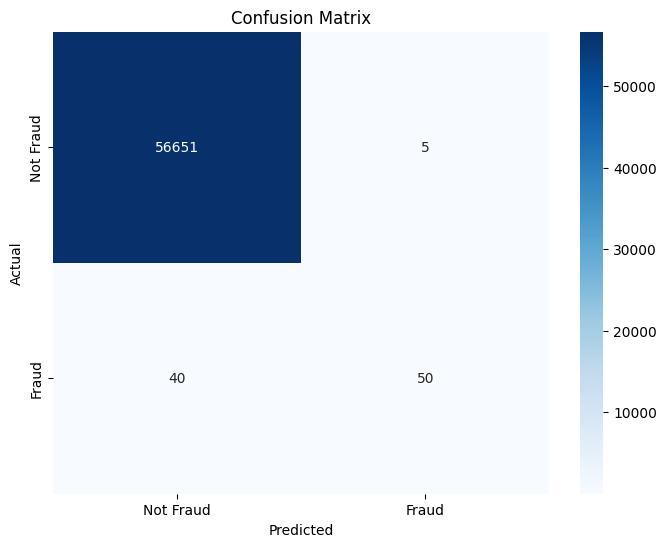

Accuracy: 0.9992069925633524
Precision: 0.9090909090909091
Recall: 0.5555555555555556
F1 Score: 0.6896551724137931
ROC AUC Score: 0.7777336518246573


In [57]:
# Logistic Regression
print("Logistic Regression")
display_metrics(y_test, y_pred_LR)

- The model correctly identified 56651 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 40 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 50 fraudulent transactions (True Positives).
- The model incorrectly classified 5 non-fraudulent transactions as fraudulent (False Positives).


Random Forest Classifier


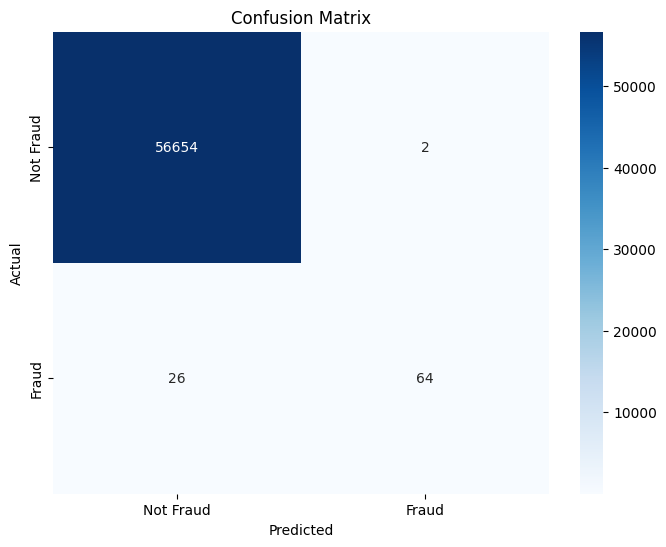

Accuracy: 0.9995065731505305
Precision: 0.9696969696969697
Recall: 0.7111111111111111
F1 Score: 0.8205128205128205
ROC AUC Score: 0.8555379051743074


In [58]:
# Random Forest Classifier
print("\nRandom Forest Classifier")
display_metrics(y_test, y_pred_RFC)

- The model correctly identified 56654 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 26 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 64 fraudulent transactions (True Positives).
- The model incorrectly classified 2 non-fraudulent transactions as fraudulent (False Positives).


AdaBoost Classifier


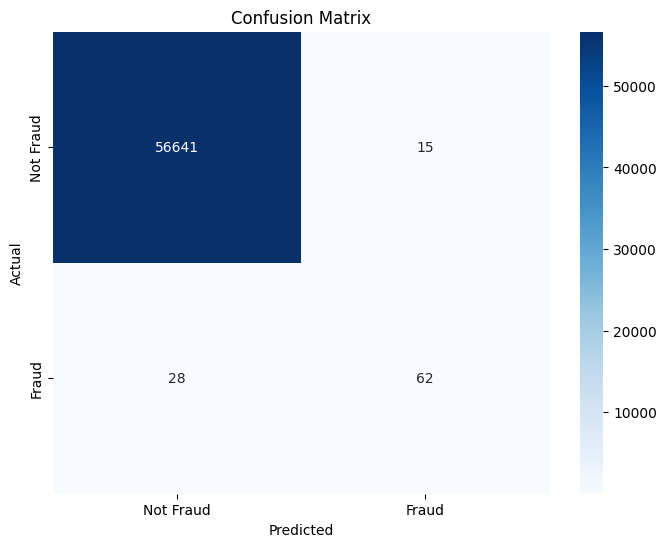

Accuracy: 0.9992422373383146
Precision: 0.8051948051948052
Recall: 0.6888888888888889
F1 Score: 0.7425149700598802
ROC AUC Score: 0.8443120665850826


In [59]:
# AdaBoost Classifier
print("\nAdaBoost Classifier")
display_metrics(y_test, y_pred_ABC)

- The model correctly identified 56641 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 28 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 62 fraudulent transactions (True Positives).
- The model incorrectly classified 15 non-fraudulent transactions as fraudulent (False Positives).


CatBoost Classifier


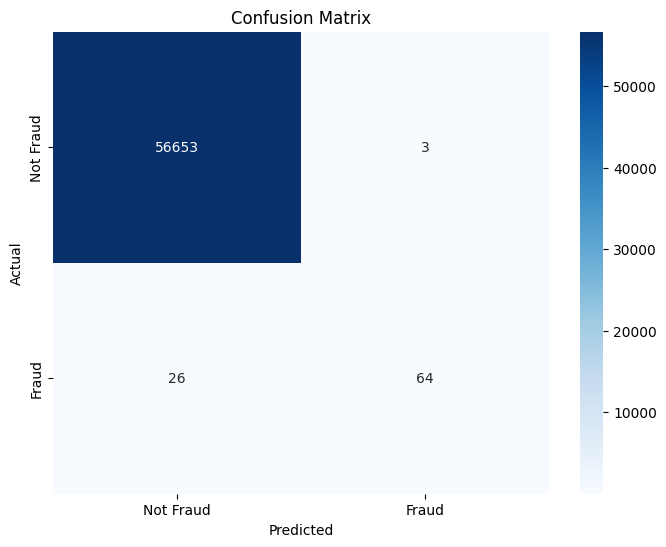

Accuracy: 0.9994889507630493
Precision: 0.9552238805970149
Recall: 0.7111111111111111
F1 Score: 0.8152866242038217
ROC AUC Score: 0.8555290799836832
ROC AUC Score (CatBoost): 0.9842584094260881


In [60]:
# CatBoost Classifier
print("\nCatBoost Classifier")
display_metrics(y_test, y_pred_CBC)
roc_auc_cbc = roc_auc_score(y_test, probs_CBC)
print("ROC AUC Score (CatBoost):", roc_auc_cbc)

- The model correctly identified 56653 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 26 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 64 fraudulent transactions (True Positives).
- The model incorrectly classified 3 non-fraudulent transactions as fraudulent (False Positives).

# SMOTE (Synthetic Minority Over-sampling Technique)

In [61]:
from imblearn.over_sampling import SMOTE

# Resample the dataset using SMOTE
smote = SMOTE(random_state=RANDOM_STATE)

# Resample the training dataset using SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [62]:
# Check class distribution in the SMOTE oversampled training set

print("Class distribution in the SMOTE oversampled training set:")
print(pd.Series(y_train_smote).value_counts(normalize=True) * 100)

Class distribution in the SMOTE oversampled training set:
0    50.0
1    50.0
Name: Class, dtype: float64


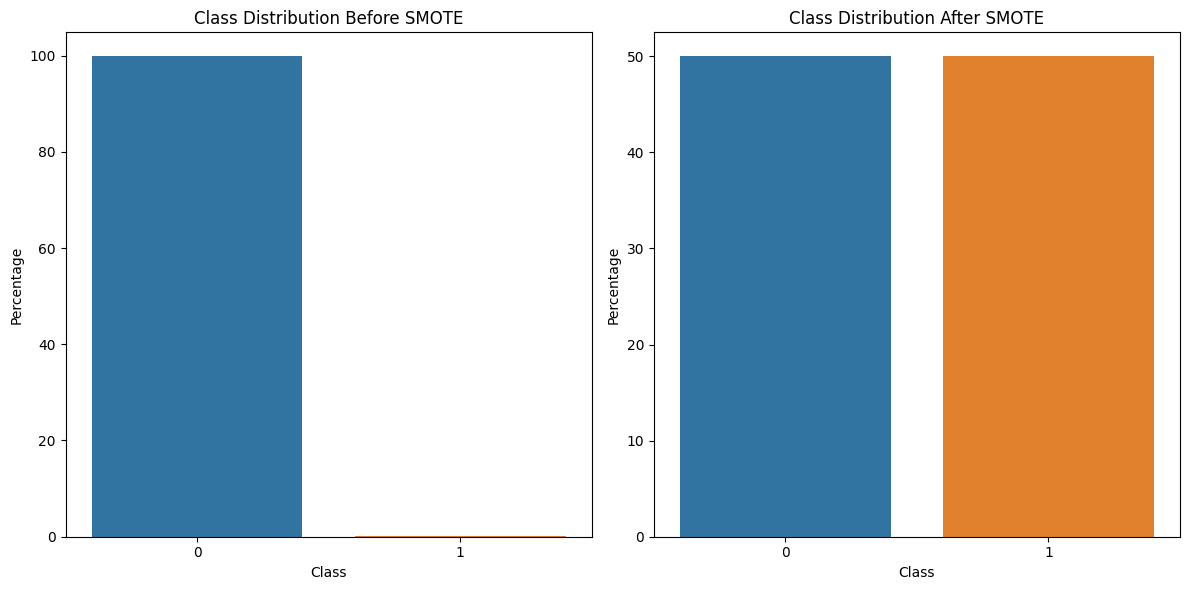

<Figure size 640x480 with 0 Axes>

In [63]:
# Visualize class distribution before and after SMOTE
class_distr_before = pd.Series(y_train).value_counts(normalize=True) * 100
smote_class_distr = pd.Series(y_train_smote).value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)
sns.barplot(x=class_distr_before.index, y=class_distr_before.values)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Percentage')


plt.subplot(1, 2, 2)
sns.barplot(x=smote_class_distr.index, y=smote_class_distr.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [65]:
#metric used for RandomForrestClassifier
RFC_METRIC = 'gini'

#number of estimators used for RandomForrestClassifier
NUM_ESTIMATORS = 100

#number of parallel jobs used for RandomForrestClassifier
NO_JOBS = 4

## RandomForestClassifier Hyperparameter Tuning

In [66]:
# rfc_param_grid = {
#     'n_estimators': [100, 200, 300],
#    'max_depth': [4, 6, 8],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
# }

rfc_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [67]:
# Initialize RandomForestClassifier
rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=NO_JOBS)
rfc_grid_search = GridSearchCV(estimator=rfc,
                               param_grid=rfc_param_grid,
                               scoring='roc_auc',
                               cv=3,
                               n_jobs=-1,
                               verbose=1)

In [68]:
rfc_grid_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=4, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

Tuned RFC ROC AUC Score: 0.9147427751106091


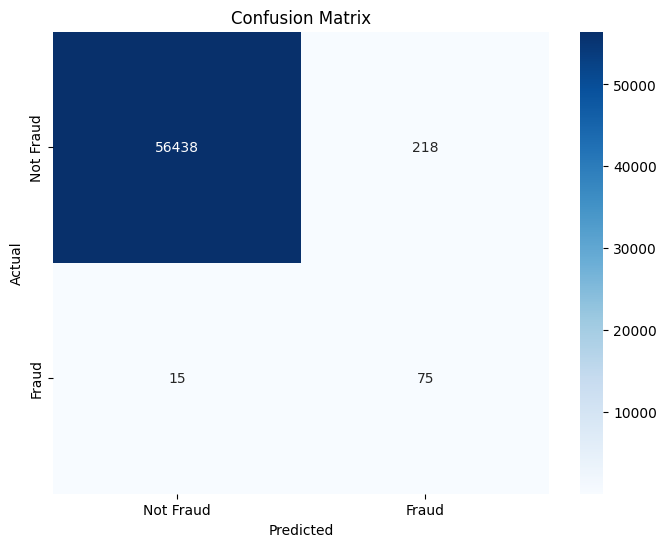

Accuracy: 0.995893983716914
Precision: 0.25597269624573377
Recall: 0.8333333333333334
F1 Score: 0.391644908616188
ROC AUC Score: 0.9147427751106091


In [69]:
best_rfc = rfc_grid_search.best_estimator_
y_pred_rfc_tuned = best_rfc.predict(x_test)
roc_auc_rfc_tuned = roc_auc_score(y_test, y_pred_rfc_tuned)
print("Tuned RFC ROC AUC Score:", roc_auc_rfc_tuned)
display_metrics(y_test, y_pred_rfc_tuned)

- The model correctly identified 56438 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 15 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 75 fraudulent transactions (True Positives).
- The model incorrectly classified 218 non-fraudulent transactions as fraudulent (False Positives).

### Random Forest Classifier (Tuned) Feature Importance

In [70]:
# Get feature importance from the trained Random Forest Classifier
feature_importance_rfc = best_rfc.feature_importances_

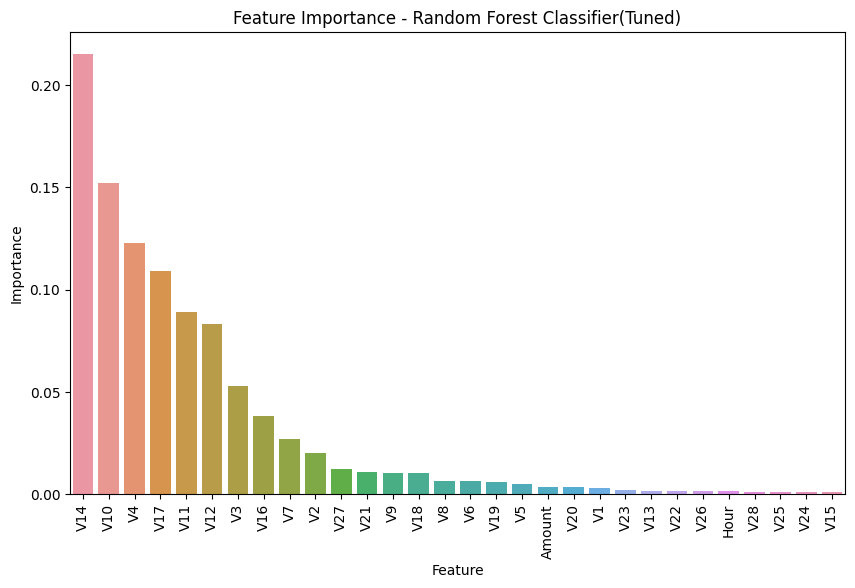

In [71]:
# Create DataFrame to store feature importance values
feature_importance_df_rfc = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance_rfc})

# Sort DataFrame by importance values in descending order
feature_importance_df_rfc = feature_importance_df_rfc.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df_rfc)
plt.title('Feature Importance - Random Forest Classifier(Tuned)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

The important features are V14, V10, V4, V17, and V11.

## LogisticRegression Hyperparameter Tuning

In [72]:
# lr_param_grid = {
#    'C': [0.01, 0.1, 1, 10, 100],
#    'penalty': ['l1', 'l2']
# }

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [73]:
# Initialize LogisticRegression

# lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr = LogisticRegression(solver='liblinear', max_iter=500)
lr_grid_search = GridSearchCV(estimator=lr,
                              param_grid=lr_param_grid,
                              scoring='roc_auc',
                              cv=3,
                              n_jobs=-1,
                              verbose=1)

In [74]:
lr_grid_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

Tuned LR ROC AUC Score: 0.9419912375662869


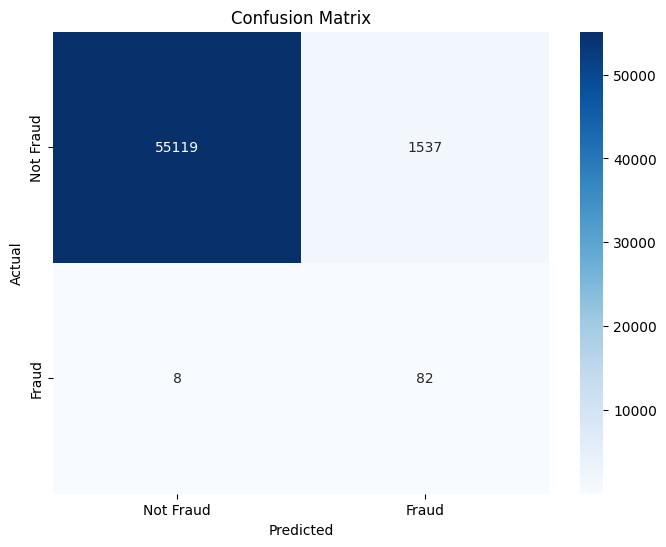

Accuracy: 0.9727734113417685
Precision: 0.0506485484867202
Recall: 0.9111111111111111
F1 Score: 0.09596255119953188
ROC AUC Score: 0.9419912375662869


In [75]:
best_lr = lr_grid_search.best_estimator_
y_pred_lr_tuned = best_lr.predict(x_test)
roc_auc_lr_tuned = roc_auc_score(y_test, y_pred_lr_tuned)
print("Tuned LR ROC AUC Score:", roc_auc_lr_tuned)
display_metrics(y_test, y_pred_lr_tuned)

- The model correctly identified 55119 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 8 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 82 fraudulent transactions (True Positives).
- The model incorrectly classified 1537 non-fraudulent transactions as fraudulent (False Positives).

#### Logistic Regression (Tuned) Feature Importance

In [76]:
# Get feature importance from the trained Logistic Regression Classifier
feature_importance_lr = best_lr.coef_[0]

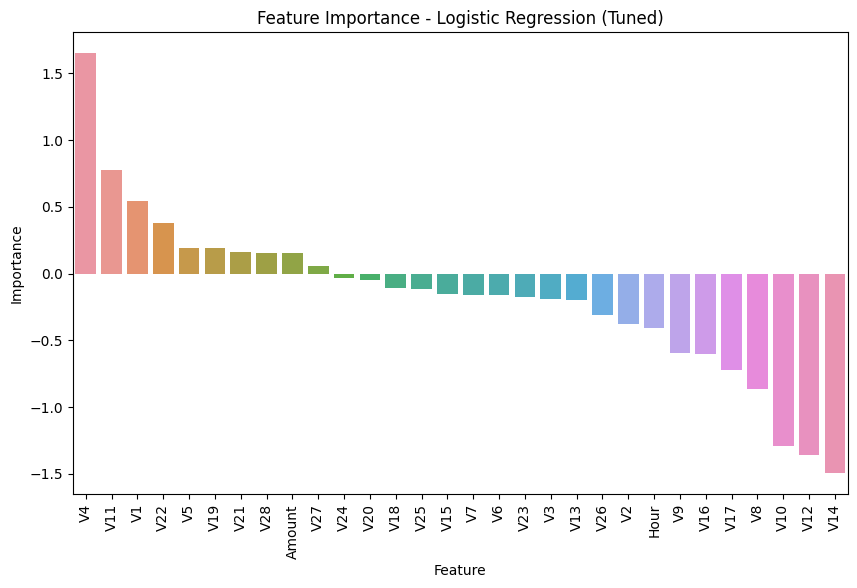

In [77]:
# Create DataFrame to store feature importance values
feature_importance_df_lr = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance_lr})

# Sort DataFrame by importance values in descending order
feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df_lr)
plt.title('Feature Importance - Logistic Regression (Tuned)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

The important features are V4, V11, V1, V22, V5, and V19.

## AdaBoostClassifier Hyperparameter Tuning

In [78]:
# abc_param_grid = {
#    'n_estimators': [50, 100, 200],
#    'learning_rate': [0.01, 0.1, 1]
# }

abc_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

In [79]:
# Initialize AdaBoostClassifier with SAMME algorithm
abc = AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)
abc_grid_search = GridSearchCV(estimator=abc,
                               param_grid=abc_param_grid,
                               scoring='roc_auc',
                               cv=3,
                               n_jobs=-1,
                               verbose=1)

In [80]:
abc_grid_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=1)

Tuned ABC ROC AUC Score: 0.9247464228560671


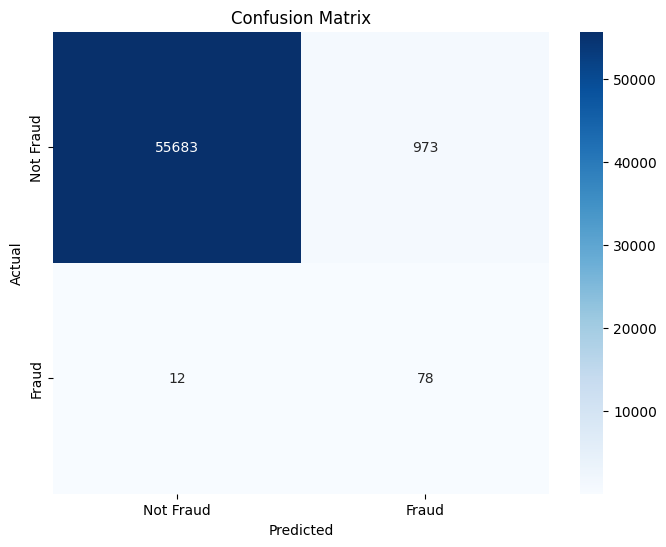

Accuracy: 0.9826419483311599
Precision: 0.07421503330161751
Recall: 0.8666666666666667
F1 Score: 0.13672217353198948
ROC AUC Score: 0.9247464228560671


In [81]:
best_abc = abc_grid_search.best_estimator_
y_pred_abc_tuned = best_abc.predict(x_test)
roc_auc_abc_tuned = roc_auc_score(y_test, y_pred_abc_tuned)
print("Tuned ABC ROC AUC Score:", roc_auc_abc_tuned)
display_metrics(y_test, y_pred_abc_tuned)

- The model correctly identified 56683 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 12 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 78 fraudulent transactions (True Positives).
- The model incorrectly classified 973 non-fraudulent transactions as fraudulent (False Positives).

#### AdaBoost Classifier (Tuned) Feature Importance

In [82]:
# Get feature importance from the trained AdaBoostClassifier
feature_importance_abc = best_abc.feature_importances_

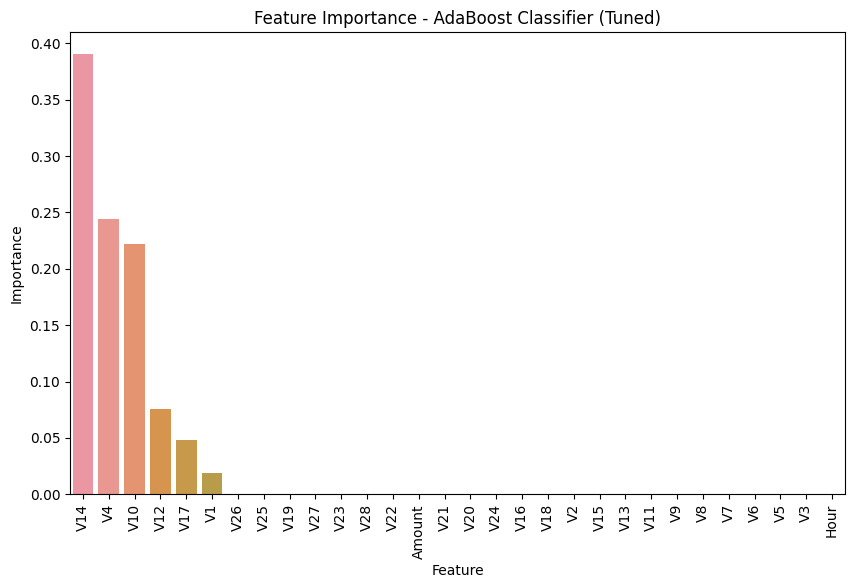

In [83]:
# Create DataFrame to store feature importance values
feature_importance_df_abc = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance_abc})

# Sort DataFrame by importance values in descending order
feature_importance_df_abc = feature_importance_df_abc.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df_abc)
plt.title('Feature Importance - AdaBoost Classifier (Tuned)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

The important features are V14, V4, V10, V12, V17, and V1.

## CatBoostClassifier Hyperparameter Tuning

In [84]:
# cbc_param_grid = {
#    'iterations': [500, 1000],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'depth': [6, 8, 10, 12],
#    'l2_leaf_reg': [1, 3, 5, 7, 9]
#}

cbc_param_grid = {
    'iterations': [500],
    'learning_rate': [0.01, 0.05],
    'depth': [6, 8]
}

In [85]:
# Initialize CatBoostClassifier
cbc = CatBoostClassifier(random_seed=RANDOM_STATE,
                         bagging_temperature=0.2,
                         od_type='Iter',
                         od_wait=100,
                         eval_metric='AUC')

In [86]:
cbc_grid_search = GridSearchCV(estimator=cbc,
                               param_grid=cbc_param_grid,
                               scoring='roc_auc',
                               cv=3,
                               n_jobs=-1,
                               verbose=1)

In [87]:
cbc_grid_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0:	total: 453ms	remaining: 3m 45s
1:	total: 805ms	remaining: 3m 20s
2:	total: 1.13s	remaining: 3m 7s
3:	total: 1.44s	remaining: 2m 58s
4:	total: 1.84s	remaining: 3m 2s
5:	total: 2.32s	remaining: 3m 11s
6:	total: 2.73s	remaining: 3m 12s
7:	total: 3.04s	remaining: 3m 6s
8:	total: 3.37s	remaining: 3m 4s
9:	total: 3.61s	remaining: 2m 57s
10:	total: 3.85s	remaining: 2m 51s
11:	total: 4.08s	remaining: 2m 46s
12:	total: 4.3s	remaining: 2m 41s
13:	total: 4.5s	remaining: 2m 36s
14:	total: 4.78s	remaining: 2m 34s
15:	total: 5.04s	remaining: 2m 32s
16:	total: 5.38s	remaining: 2m 32s
17:	total: 5.99s	remaining: 2m 40s
18:	total: 6.32s	remaining: 2m 39s
19:	total: 6.55s	remaining: 2m 37s
20:	total: 6.81s	remaining: 2m 35s
21:	total: 7.05s	remaining: 2m 33s
22:	total: 7.28s	remaining: 2m 31s
23:	total: 7.48s	remaining: 2m 28s
24:	total: 7.69s	remaining: 2m 26s
25:	total: 7.96s	remaining: 2m 25s
26:	total: 8.24s	remaining: 2m 24s
27:	total: 

233:	total: 51.6s	remaining: 58.7s
234:	total: 51.8s	remaining: 58.4s
235:	total: 52s	remaining: 58.2s
236:	total: 52.3s	remaining: 58s
237:	total: 52.5s	remaining: 57.8s
238:	total: 52.8s	remaining: 57.6s
239:	total: 53.1s	remaining: 57.5s
240:	total: 53.3s	remaining: 57.2s
241:	total: 53.5s	remaining: 57s
242:	total: 53.7s	remaining: 56.8s
243:	total: 53.9s	remaining: 56.6s
244:	total: 54.2s	remaining: 56.4s
245:	total: 54.4s	remaining: 56.1s
246:	total: 54.6s	remaining: 55.9s
247:	total: 54.8s	remaining: 55.7s
248:	total: 55s	remaining: 55.4s
249:	total: 55.2s	remaining: 55.2s
250:	total: 55.4s	remaining: 54.9s
251:	total: 55.6s	remaining: 54.7s
252:	total: 55.7s	remaining: 54.4s
253:	total: 55.9s	remaining: 54.2s
254:	total: 56.1s	remaining: 53.9s
255:	total: 56.3s	remaining: 53.7s
256:	total: 56.6s	remaining: 53.5s
257:	total: 56.9s	remaining: 53.4s
258:	total: 57.1s	remaining: 53.1s
259:	total: 57.4s	remaining: 53s
260:	total: 57.6s	remaining: 52.7s
261:	total: 57.8s	remaining: 5

466:	total: 1m 36s	remaining: 6.84s
467:	total: 1m 36s	remaining: 6.63s
468:	total: 1m 37s	remaining: 6.41s
469:	total: 1m 37s	remaining: 6.2s
470:	total: 1m 37s	remaining: 5.99s
471:	total: 1m 37s	remaining: 5.79s
472:	total: 1m 37s	remaining: 5.58s
473:	total: 1m 37s	remaining: 5.37s
474:	total: 1m 38s	remaining: 5.16s
475:	total: 1m 38s	remaining: 4.95s
476:	total: 1m 38s	remaining: 4.74s
477:	total: 1m 38s	remaining: 4.53s
478:	total: 1m 38s	remaining: 4.33s
479:	total: 1m 38s	remaining: 4.12s
480:	total: 1m 38s	remaining: 3.91s
481:	total: 1m 39s	remaining: 3.7s
482:	total: 1m 39s	remaining: 3.49s
483:	total: 1m 39s	remaining: 3.29s
484:	total: 1m 39s	remaining: 3.08s
485:	total: 1m 39s	remaining: 2.88s
486:	total: 1m 40s	remaining: 2.67s
487:	total: 1m 40s	remaining: 2.47s
488:	total: 1m 40s	remaining: 2.26s
489:	total: 1m 40s	remaining: 2.05s
490:	total: 1m 40s	remaining: 1.85s
491:	total: 1m 41s	remaining: 1.64s
492:	total: 1m 41s	remaining: 1.44s
493:	total: 1m 41s	remaining: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002A30F0C9E10>,
             n_jobs=-1,
             param_grid={'depth': [6, 8], 'iterations': [500],
                         'learning_rate': [0.01, 0.05]},
             scoring='roc_auc', verbose=1)

In [88]:
best_cbc = cbc_grid_search.best_estimator_
probs_cbc_tuned = best_cbc.predict_proba(x_test)[:, 1]
y_pred_cbc_tuned = (probs_cbc_tuned > 0.5).astype(int)

In [89]:
roc_auc_cbc_tuned = roc_auc_score(y_test, probs_cbc_tuned)
print("Tuned CBC ROC AUC Score:", roc_auc_cbc_tuned)

Tuned CBC ROC AUC Score: 0.976124721516207


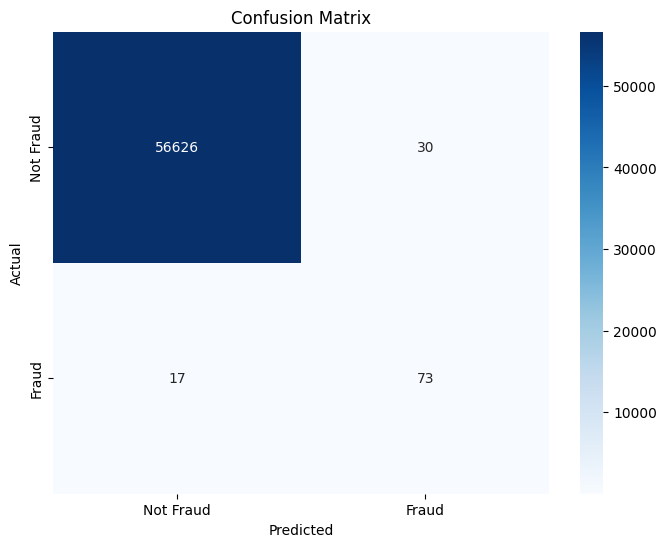

Accuracy: 0.9991717477883904
Precision: 0.7087378640776699
Recall: 0.8111111111111111
F1 Score: 0.7564766839378239
ROC AUC Score: 0.9052907998368319


In [90]:
display_metrics(y_test, y_pred_cbc_tuned)

- The model correctly identified 56626 non-fraudulent transactions (True Negatives).
- The model incorrectly classified 17 fraudulent transactions as non-fraudulent (False Negatives).
- The model correctly identified 73 fraudulent transactions (True Positives).
- The model incorrectly classified 30 non-fraudulent transactions as fraudulent (False Positives).

### CatBoost Classifier (Tuned) Feature Importance

In [91]:
# Get feature importance from the trained CatBoostClassifier
feature_importance_cbc = best_cbc.feature_importances_

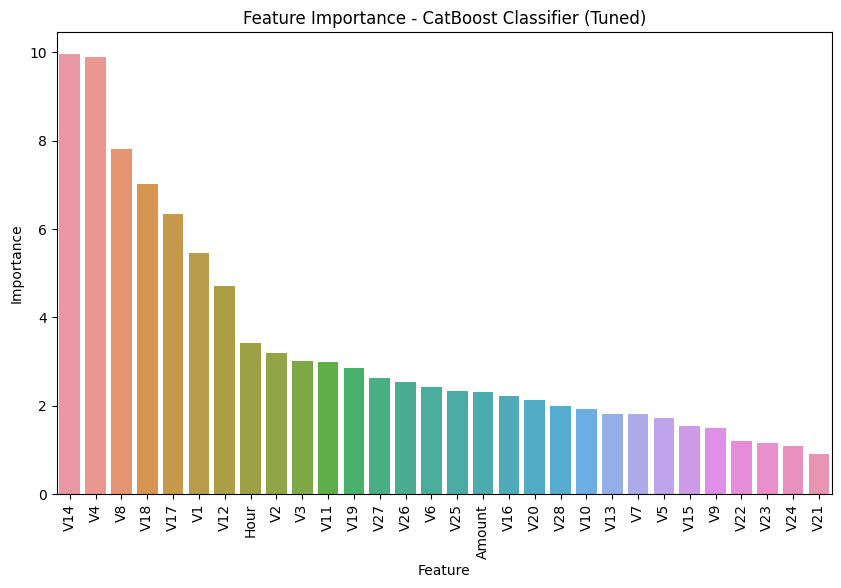

In [92]:
# Create DataFrame to store feature importance values
feature_importance_df_cbc = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance_cbc})

# Sort DataFrame by importance values in descending order
feature_importance_df_cbc = feature_importance_df_cbc.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df_cbc)
plt.title('Feature Importance - CatBoost Classifier (Tuned)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

The important features are V14, V4, V8, V18, and V17.

In [94]:
# Define the tuned classifiers and their respective ROC AUC scores
tuned_classifiers = {
    "Random Forest Classifier": roc_auc_rfc_tuned,
    "Logistic Regression": roc_auc_lr_tuned,
    "AdaBoost Classifier": roc_auc_abc_tuned,
    "CatBoost Classifier": roc_auc_cbc_tuned
}

# Find the best model
best_model_name = max(tuned_classifiers, key=tuned_classifiers.get)
best_roc_auc_score = tuned_classifiers[best_model_name]

# Print the best model and its ROC AUC score
print("Best Model:", best_model_name)
print("ROC AUC Score:", best_roc_auc_score)

Best Model: CatBoost Classifier
ROC AUC Score: 0.976124721516207


#### We have identified the CatBoost Classifier model that performs best in a variety of evaluation metrics, including ROC AUC Score, accuracy, precision and F1 score, by optimising parameters using hyperparameter adjustments. To increase the model's predictive power, hyperparameter tuning involved a systematic exploration of different parameters combinations. In order to guarantee its reliability and generalization of unseen data, the selected model has been subjected to rigorous testing and verification.  We're going to use as our final choice for deployment this highly successful model.